In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

# from tensorflow.compat.v1.keras.backend import get_session
# tensorflow.compat.v1.disable_v2_behavior()
# import shap

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Input
from sklearn import preprocessing

import tensorflow as tf
import tensorflow
filename = 'best_base_line'

# model.save(filename)
model = tensorflow.keras.models.load_model(filename)
model.save_weights( 'best_base_line_Weightfile.h5')

import numpy as np
import os
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt
#plt.ion()
%matplotlib widget

#import mpld3
#mpld3.enable_notebook()
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Only using years 2010, 2011, 2012, 2013, and 2014 because of the auroral boundary database used only has those dates

In [2]:
file_load_df_cumulative = '../ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.sort_values(by=['ID_SC', 'Datetimes'])
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

cols_to_drop_validation = [c for c in df_cumulative.columns if ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
# cols_to_drop_validation = [c for c in df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('5min' in c) | ('15min' in c) | ('newell' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]

df_cumulative = df_cumulative.drop(columns=cols_to_drop_validation)

# Separate training and testing data
mask_val = [(df_cumulative.index.year == 2010) & (df_cumulative['ID_SC'].values==16)]
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])

mask_for_2010_to_2014 = [(df_train.index.year == 2010) | (df_train.index.year == 2011)
                         | (df_train.index.year == 2012) |(df_train.index.year == 2013)
                         | (df_train.index.year == 2014)]
df_train = df_train[mask_for_2010_to_2014[0]]
df_train = df_train.sort_values(by=['ID_SC', 'Datetimes'])
df_val = df_val.sort_values(by=['ID_SC', 'Datetimes'])

In [3]:
# Construct X and y
feature_cols = [c for c in df_train.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

# First train without considering the auroral regions at all to get a baseline MSE accuracy

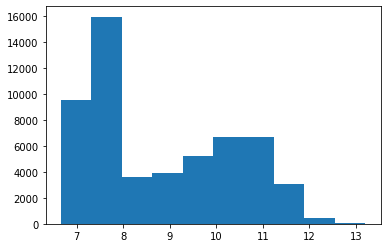

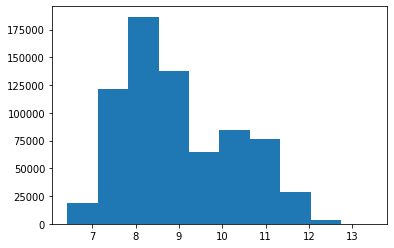

In [4]:
plt.figure()
# summarize history for loss
plt.hist(y_val_log.values)
plt.show()

plt.figure()
# summarize history for loss
plt.hist(y_train_log.values)
plt.show()

In [5]:
model = Sequential()
model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=1024,epochs=1000)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

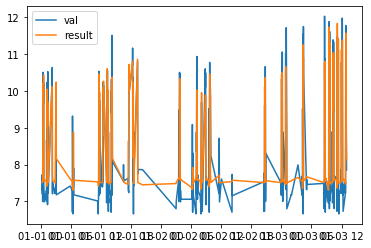

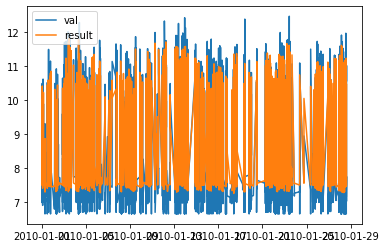

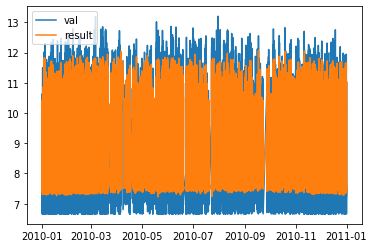

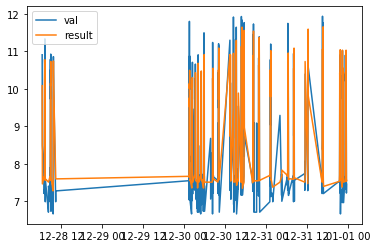

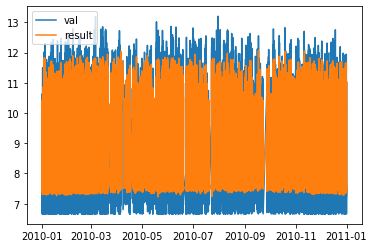

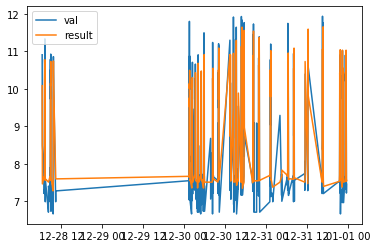

In [6]:
import tensorflow
filename = 'best_base_line'

# model.save(filename)
model = tensorflow.keras.models.load_model(filename)
model.save_weights( 'best_base_line_Weightfile.h5')

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)

df_results = pd.DataFrame(data=results, index = X_val.index)

plt.figure()
plt.plot(y_val_log[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

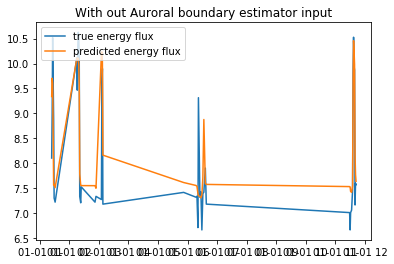

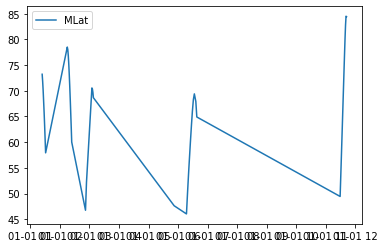

In [7]:
plt.figure()
plt.plot(y_val_log[35:80])
plt.plot(df_results[35:80])
plt.legend(['true energy flux', 'predicted energy flux'], loc='upper left')
plt.title('With out Auroral boundary estimator input')
plt.show()

plt.figure()
plt.plot(X_val['SC_AACGM_LAT'][35:80])
plt.legend(['MLat'], loc='upper left')
plt.show()

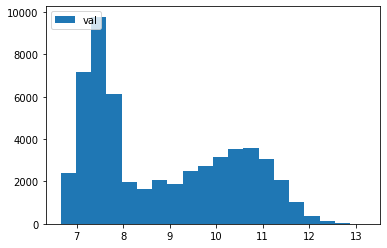

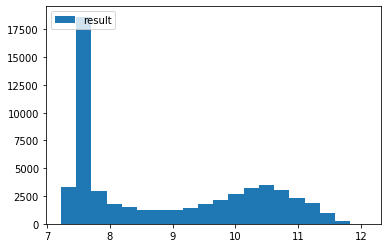

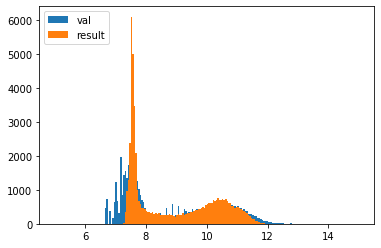

In [11]:
%matplotlib inline

plt.figure()
plt.hist(y_val_log[:],bins=20)
plt.legend(['val'], loc='upper left')
plt.show()

plt.figure()
plt.hist(df_results.values,bins=20)
plt.legend([ 'result'], loc='upper left')
plt.show()



df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

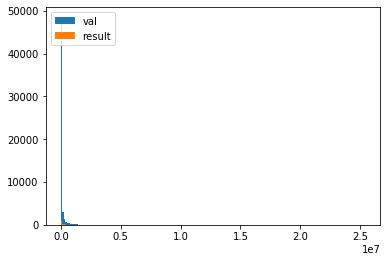

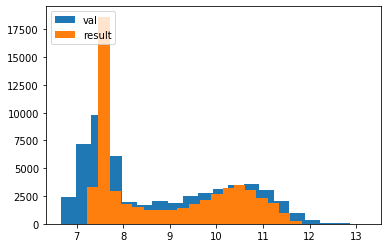

In [9]:
plt.figure()
plt.hist(10**y_val_log[:]*1.6e-6,bins=200)
plt.hist(10**df_results.values*1.6e-6,bins=200)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y_val_log[:],bins=20)
plt.hist(df_results.values,bins=20)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=1024,epochs=80)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/80
1805/1805 [==============================] - 3s 2ms/step - loss: 8.6086 - mse: 8.6086 - val_loss: 2.5380 - val_mse: 2.5380
Epoch 2/80
1805/1805 [==============================] - 3s 2ms/step - loss: 1.6448 - mse: 1.6448 - val_loss: 2.2903 - val_mse: 2.2903
Epoch 3/80
1805/1805 [==============================] - 3s 2ms/step - loss: 1.0343 - mse: 1.0343 - val_loss: 1.3969 - val_mse: 1.3969
Epoch 4/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.7107 - mse: 0.7107 - val_loss: 1.0691 - val_mse: 1.0691
Epoch 5/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6310 - mse: 0.6310 - val_loss: 0.9514 - val_mse: 0.9514
Epoch 6/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5876 - mse: 0.5876 - val_loss: 0.8517 - val_mse: 0.8517
Epoch 7/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5558 - mse: 0.5558 - val_loss: 0.7815 - val_mse: 0.7815
Epoch 8/80
1805/1805 [==============================] - 3s 2ms

Epoch 62/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 63/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4533 - mse: 0.4533 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 64/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4536 - mse: 0.4536 - val_loss: 0.6714 - val_mse: 0.6714
Epoch 65/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4516 - mse: 0.4516 - val_loss: 0.6660 - val_mse: 0.6660
Epoch 66/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4518 - mse: 0.4518 - val_loss: 0.6855 - val_mse: 0.6855
Epoch 67/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4518 - mse: 0.4518 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 68/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4530 - mse: 0.4530 - val_loss: 0.6733 - val_mse: 0.6733
Epoch 69/80
1805/1805 [==============================] 

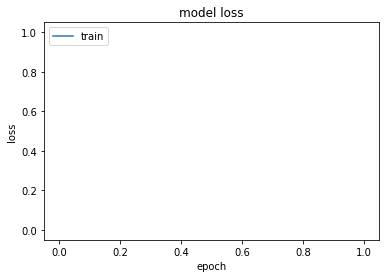

In [12]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=80)

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/80
1805/1805 [==============================] - 3s 2ms/step - loss: 8.0783 - mse: 8.0783 - val_loss: 1.6537 - val_mse: 1.6537
Epoch 2/80
1805/1805 [==============================] - 3s 2ms/step - loss: 1.5032 - mse: 1.5032 - val_loss: 1.2887 - val_mse: 1.2887
Epoch 3/80
1805/1805 [==============================] - 3s 2ms/step - loss: 1.0097 - mse: 1.0097 - val_loss: 0.9099 - val_mse: 0.9099
Epoch 4/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.7442 - mse: 0.7442 - val_loss: 0.7101 - val_mse: 0.7101
Epoch 5/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6307 - mse: 0.6307 - val_loss: 0.6890 - val_mse: 0.6890
Epoch 6/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.6641 - val_mse: 0.6641
Epoch 7/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 8/80
1805/1805 [==============================] - 3s 2ms

Epoch 62/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4724 - mse: 0.4724 - val_loss: 0.5952 - val_mse: 0.5952
Epoch 63/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4724 - mse: 0.4724 - val_loss: 0.5894 - val_mse: 0.5894
Epoch 64/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4717 - mse: 0.4717 - val_loss: 0.5902 - val_mse: 0.5902
Epoch 65/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4716 - mse: 0.4716 - val_loss: 0.5971 - val_mse: 0.5971
Epoch 66/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4714 - mse: 0.4714 - val_loss: 0.6013 - val_mse: 0.6013
Epoch 67/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4702 - mse: 0.4702 - val_loss: 0.5986 - val_mse: 0.5986
Epoch 68/80
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6156 - val_mse: 0.6156
Epoch 69/80
1805/1805 [==============================] 

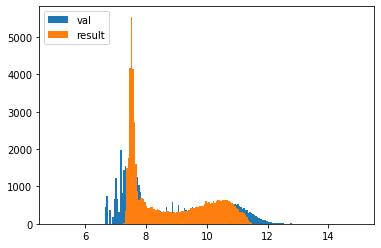

In [24]:
model = Sequential()
model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=80)

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

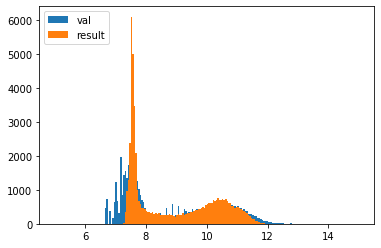

In [13]:
plt.show()

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))

plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/80
1805/1805 [==============================] - 4s 2ms/step - loss: 7.8354 - mse: 7.8354 - val_loss: 2.6902 - val_mse: 2.6902
Epoch 2/80
1805/1805 [==============================] - 4s 2ms/step - loss: 1.5101 - mse: 1.5101 - val_loss: 1.4770 - val_mse: 1.4770
Epoch 3/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.8693 - mse: 0.8693 - val_loss: 0.8066 - val_mse: 0.8066
Epoch 4/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.6667 - mse: 0.6667 - val_loss: 0.7513 - val_mse: 0.7513
Epoch 5/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.5998 - mse: 0.5998 - val_loss: 0.6912 - val_mse: 0.6912
Epoch 6/80
1805/1805 [==============================] - 5s 3ms/step - loss: 0.5610 - mse: 0.5610 - val_loss: 0.6802 - val_mse: 0.6802
Epoch 7/80
1805/1805 [==============================] - 5s 3ms/step - loss: 0.5433 - mse: 0.5433 - val_loss: 0.6794 - val_mse: 0.6794
Epoch 8/80
1805/1805 [==============================] - 5s 3ms

Epoch 62/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4534 - mse: 0.4534 - val_loss: 0.6811 - val_mse: 0.6811
Epoch 63/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4540 - mse: 0.4540 - val_loss: 0.6674 - val_mse: 0.6674
Epoch 64/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4527 - mse: 0.4527 - val_loss: 0.6688 - val_mse: 0.6688
Epoch 65/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4526 - mse: 0.4526 - val_loss: 0.6672 - val_mse: 0.6672
Epoch 66/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4530 - mse: 0.4530 - val_loss: 0.7105 - val_mse: 0.7105
Epoch 67/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6711 - val_mse: 0.6711
Epoch 68/80
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4513 - mse: 0.4513 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 69/80
1805/1805 [==============================] 

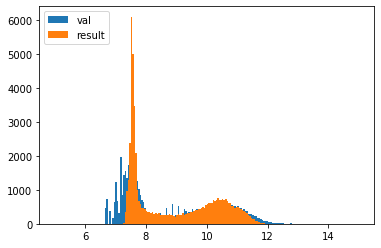

In [15]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=80)

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/500
1805/1805 [==============================] - 3s 2ms/step - loss: 8.1902 - mse: 8.1902 - val_loss: 2.4431 - val_mse: 2.4431
Epoch 2/500
1805/1805 [==============================] - 3s 2ms/step - loss: 1.9831 - mse: 1.9831 - val_loss: 2.2188 - val_mse: 2.2188
Epoch 3/500
1805/1805 [==============================] - 3s 2ms/step - loss: 1.1212 - mse: 1.1212 - val_loss: 0.9185 - val_mse: 0.9185
Epoch 4/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6964 - mse: 0.6964 - val_loss: 0.7327 - val_mse: 0.7327
Epoch 5/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6182 - mse: 0.6182 - val_loss: 0.6908 - val_mse: 0.6908
Epoch 6/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5672 - mse: 0.5672 - val_loss: 0.6686 - val_mse: 0.6686
Epoch 7/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5471 - mse: 0.5471 - val_loss: 0.6621 - val_mse: 0.6621
Epoch 8/500
1805/1805 [==============================] 

1805/1805 [==============================] - 3s 2ms/step - loss: 0.4549 - mse: 0.4549 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 62/500
1805/1805 [==============================] - 3s 1ms/step - loss: 0.4545 - mse: 0.4545 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 63/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.6346 - val_mse: 0.6346
Epoch 64/500
1805/1805 [==============================] - 3s 1ms/step - loss: 0.4529 - mse: 0.4529 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 65/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4556 - mse: 0.4556 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 66/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4531 - mse: 0.4531 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 67/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4524 - mse: 0.4524 - val_loss: 0.6561 - val_mse: 0.6561
Epoch 68/500
1805/1805 [==============================] - 3s 

1805/1805 [==============================] - 3s 2ms/step - loss: 0.4397 - mse: 0.4397 - val_loss: 0.6432 - val_mse: 0.6432
Epoch 122/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 123/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4390 - mse: 0.4390 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 124/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4386 - mse: 0.4386 - val_loss: 0.6435 - val_mse: 0.6435
Epoch 125/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4371 - mse: 0.4371 - val_loss: 0.6582 - val_mse: 0.6582
Epoch 126/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4373 - mse: 0.4373 - val_loss: 0.6569 - val_mse: 0.6569
Epoch 127/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6583 - val_mse: 0.6583
Epoch 128/500
1805/1805 [==============================

Epoch 181/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 182/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 183/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.6646 - val_mse: 0.6646
Epoch 184/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.6428 - val_mse: 0.6428
Epoch 185/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4292 - mse: 0.4292 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 186/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6727 - val_mse: 0.6727
Epoch 187/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 188/500
1805/1805 [================

Epoch 241/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4255 - mse: 0.4255 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 242/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4237 - mse: 0.4237 - val_loss: 0.6546 - val_mse: 0.6546
Epoch 243/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4235 - mse: 0.4235 - val_loss: 0.6568 - val_mse: 0.6568
Epoch 244/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4229 - mse: 0.4229 - val_loss: 0.6560 - val_mse: 0.6560
Epoch 245/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6666 - val_mse: 0.6666
Epoch 246/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.6568 - val_mse: 0.6568
Epoch 247/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4229 - mse: 0.4229 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 248/500
1805/1805 [================

Epoch 301/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.6677 - val_mse: 0.6677
Epoch 302/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4204 - mse: 0.4204 - val_loss: 0.6634 - val_mse: 0.6634
Epoch 303/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.6489 - val_mse: 0.6489
Epoch 304/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4203 - mse: 0.4203 - val_loss: 0.6568 - val_mse: 0.6568
Epoch 305/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4193 - mse: 0.4193 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 306/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4193 - mse: 0.4193 - val_loss: 0.6545 - val_mse: 0.6545
Epoch 307/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4191 - mse: 0.4191 - val_loss: 0.6740 - val_mse: 0.6740
Epoch 308/500
1805/1805 [================

Epoch 361/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 362/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 363/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6437 - val_mse: 0.6437
Epoch 364/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4164 - mse: 0.4164 - val_loss: 0.6496 - val_mse: 0.6496
Epoch 365/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4162 - mse: 0.4162 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 366/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4167 - mse: 0.4167 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 367/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.6478 - val_mse: 0.6478
Epoch 368/500
1805/1805 [================

Epoch 421/500
1805/1805 [==============================] - 5s 3ms/step - loss: 0.4142 - mse: 0.4142 - val_loss: 0.6480 - val_mse: 0.6480
Epoch 422/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4152 - mse: 0.4152 - val_loss: 0.6596 - val_mse: 0.6596
Epoch 423/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4160 - mse: 0.4160 - val_loss: 0.6407 - val_mse: 0.6407
Epoch 424/500
1805/1805 [==============================] - 5s 3ms/step - loss: 0.4147 - mse: 0.4147 - val_loss: 0.6379 - val_mse: 0.6379
Epoch 425/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4145 - mse: 0.4145 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 426/500
1805/1805 [==============================] - 5s 3ms/step - loss: 0.4151 - mse: 0.4151 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 427/500
1805/1805 [==============================] - 5s 3ms/step - loss: 0.4146 - mse: 0.4146 - val_loss: 0.6460 - val_mse: 0.6460
Epoch 428/500
1805/1805 [================

Epoch 481/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 482/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4128 - mse: 0.4128 - val_loss: 0.6432 - val_mse: 0.6432
Epoch 483/500
1805/1805 [==============================] - 5s 3ms/step - loss: 0.4131 - mse: 0.4131 - val_loss: 0.6508 - val_mse: 0.6508
Epoch 484/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4132 - mse: 0.4132 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 485/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4134 - mse: 0.4134 - val_loss: 0.6415 - val_mse: 0.6415
Epoch 486/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.6453 - val_mse: 0.6453
Epoch 487/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.4132 - mse: 0.4132 - val_loss: 0.6565 - val_mse: 0.6565
Epoch 488/500
1805/1805 [================

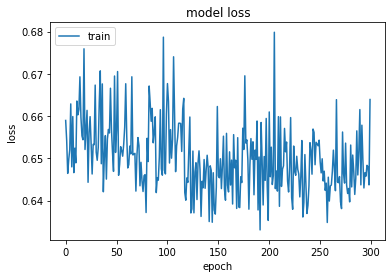

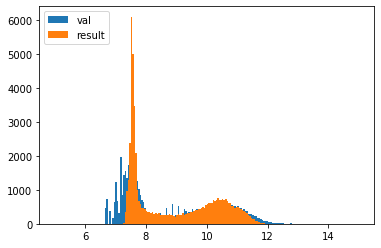

In [14]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=200)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

In [16]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=200)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/500
1805/1805 [==============================] - 4s 2ms/step - loss: 7.7602 - mse: 7.7602 - val_loss: 1.9925 - val_mse: 1.9925
Epoch 2/500
1805/1805 [==============================] - 4s 2ms/step - loss: 1.4813 - mse: 1.4813 - val_loss: 1.5171 - val_mse: 1.5171
Epoch 3/500
1805/1805 [==============================] - 4s 2ms/step - loss: 1.0746 - mse: 1.0746 - val_loss: 0.9765 - val_mse: 0.9765
Epoch 4/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7638 - mse: 0.7638 - val_loss: 0.7240 - val_mse: 0.7240
Epoch 5/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.6805 - val_mse: 0.6805
Epoch 6/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.6128 - mse: 0.6128 - val_loss: 0.6660 - val_mse: 0.6660
Epoch 7/500
1805/1805 [==============================] - 4s 2ms/step - loss: 0.5964 - mse: 0.5964 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 8/500
1805/1805 [==============================] 

1805/1805 [==============================] - 3s 2ms/step - loss: 0.5019 - mse: 0.5019 - val_loss: 0.6163 - val_mse: 0.6163
Epoch 62/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5026 - mse: 0.5026 - val_loss: 0.6287 - val_mse: 0.6287
Epoch 63/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5005 - mse: 0.5005 - val_loss: 0.6690 - val_mse: 0.6690
Epoch 64/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5008 - mse: 0.5008 - val_loss: 0.6277 - val_mse: 0.6277
Epoch 65/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 66/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5006 - mse: 0.5006 - val_loss: 0.6509 - val_mse: 0.6509
Epoch 67/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4982 - mse: 0.4982 - val_loss: 0.6310 - val_mse: 0.6310
Epoch 68/500
1805/1805 [==============================] - 3s 

KeyboardInterrupt: 

In [17]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=200)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/500
1805/1805 [==============================] - 3s 2ms/step - loss: 8.8492 - mse: 8.8492 - val_loss: 1.8789 - val_mse: 1.8789
Epoch 2/500
1805/1805 [==============================] - 3s 2ms/step - loss: 1.5515 - mse: 1.5515 - val_loss: 1.5371 - val_mse: 1.5371
Epoch 3/500
1805/1805 [==============================] - 3s 2ms/step - loss: 1.2056 - mse: 1.2056 - val_loss: 1.2899 - val_mse: 1.2899
Epoch 4/500
1805/1805 [==============================] - 3s 2ms/step - loss: 1.0726 - mse: 1.0726 - val_loss: 1.1447 - val_mse: 1.1447
Epoch 5/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.8143 - mse: 0.8143 - val_loss: 0.8128 - val_mse: 0.8128
Epoch 6/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6571 - mse: 0.6571 - val_loss: 0.7412 - val_mse: 0.7412
Epoch 7/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6253 - mse: 0.6253 - val_loss: 0.6853 - val_mse: 0.6853
Epoch 8/500
1805/1805 [==============================] 

1805/1805 [==============================] - 3s 2ms/step - loss: 0.4972 - mse: 0.4972 - val_loss: 0.6866 - val_mse: 0.6866
Epoch 62/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4956 - mse: 0.4956 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 63/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4959 - mse: 0.4959 - val_loss: 0.7288 - val_mse: 0.7288
Epoch 64/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4963 - mse: 0.4963 - val_loss: 0.6597 - val_mse: 0.6597
Epoch 65/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4953 - mse: 0.4953 - val_loss: 0.6746 - val_mse: 0.6746
Epoch 66/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4947 - mse: 0.4947 - val_loss: 0.6683 - val_mse: 0.6683
Epoch 67/500
1805/1805 [==============================] - 3s 2ms/step - loss: 0.4936 - mse: 0.4936 - val_loss: 0.6819 - val_mse: 0.6819
Epoch 68/500
1805/1805 [==============================] - 3s 

KeyboardInterrupt: 

In [18]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=400,epochs=200)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/200
1805/1805 [==============================] - 3s 2ms/step - loss: 8.3689 - mse: 8.3689 - val_loss: 1.9410 - val_mse: 1.9410
Epoch 2/200
1805/1805 [==============================] - 3s 2ms/step - loss: 1.8664 - mse: 1.8664 - val_loss: 1.5949 - val_mse: 1.5949
Epoch 3/200
1805/1805 [==============================] - 3s 2ms/step - loss: 1.1760 - mse: 1.1760 - val_loss: 1.2612 - val_mse: 1.2612
Epoch 4/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.9633 - mse: 0.9633 - val_loss: 0.8470 - val_mse: 0.8470
Epoch 5/200
1805/1805 [==============================] - 4s 2ms/step - loss: 0.6999 - mse: 0.6999 - val_loss: 0.7107 - val_mse: 0.7107
Epoch 6/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6330 - mse: 0.6330 - val_loss: 0.6926 - val_mse: 0.6926
Epoch 7/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6155 - mse: 0.6155 - val_loss: 0.6812 - val_mse: 0.6812
Epoch 8/200
1805/1805 [==============================] 

1805/1805 [==============================] - 3s 2ms/step - loss: 0.5033 - mse: 0.5033 - val_loss: 0.6682 - val_mse: 0.6682
Epoch 62/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.6604 - val_mse: 0.6604
Epoch 63/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6501 - val_mse: 0.6501
Epoch 64/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5024 - mse: 0.5024 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 65/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5012 - mse: 0.5012 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 66/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5001 - mse: 0.5001 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 67/200
1805/1805 [==============================] - 3s 2ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6513 - val_mse: 0.6513
Epoch 68/200
1805/1805 [==============================] - 3s 

KeyboardInterrupt: 

In [19]:
model = Sequential()

model.add(Dense(int(128), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=1024,epochs=200)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/200
705/705 [==============================] - 1s 2ms/step - loss: 10.0833 - mse: 10.0833 - val_loss: 2.3613 - val_mse: 2.3613
Epoch 2/200
705/705 [==============================] - 1s 2ms/step - loss: 2.1379 - mse: 2.1379 - val_loss: 1.7888 - val_mse: 1.7888
Epoch 3/200
705/705 [==============================] - 1s 2ms/step - loss: 1.2851 - mse: 1.2851 - val_loss: 1.4486 - val_mse: 1.4486
Epoch 4/200
705/705 [==============================] - 1s 2ms/step - loss: 1.0977 - mse: 1.0977 - val_loss: 1.1807 - val_mse: 1.1807
Epoch 5/200
705/705 [==============================] - 1s 2ms/step - loss: 0.9257 - mse: 0.9257 - val_loss: 0.8954 - val_mse: 0.8954
Epoch 6/200
705/705 [==============================] - 1s 2ms/step - loss: 0.7497 - mse: 0.7497 - val_loss: 0.7554 - val_mse: 0.7554
Epoch 7/200
705/705 [==============================] - 1s 2ms/step - loss: 0.6773 - mse: 0.6773 - val_loss: 0.7240 - val_mse: 0.7240
Epoch 8/200
705/705 [==============================] - 1s 2ms/step 

705/705 [==============================] - 1s 2ms/step - loss: 0.5039 - mse: 0.5039 - val_loss: 0.7121 - val_mse: 0.7121
Epoch 63/200
705/705 [==============================] - 1s 2ms/step - loss: 0.5038 - mse: 0.5038 - val_loss: 0.6841 - val_mse: 0.6841
Epoch 64/200
705/705 [==============================] - 1s 2ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6971 - val_mse: 0.6971
Epoch 65/200
705/705 [==============================] - 1s 2ms/step - loss: 0.5029 - mse: 0.5029 - val_loss: 0.7625 - val_mse: 0.7625
Epoch 66/200
705/705 [==============================] - 1s 2ms/step - loss: 0.5016 - mse: 0.5016 - val_loss: 0.6814 - val_mse: 0.6814
Epoch 67/200
705/705 [==============================] - 1s 2ms/step - loss: 0.5008 - mse: 0.5008 - val_loss: 0.7792 - val_mse: 0.7792
Epoch 68/200
705/705 [==============================] - 1s 2ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 69/200
705/705 [==============================] - 1s 2ms/step - loss:

KeyboardInterrupt: 

In [20]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=1024,epochs=200)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log, index = X_val.index)

plt.figure()
plt.hist(y_val_log,bins=200, range=(5,15))
plt.hist(df_results.values[:],bins=200, range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

Epoch 1/200
705/705 [==============================] - 1s 2ms/step - loss: 9.4352 - mse: 9.4352 - val_loss: 2.1790 - val_mse: 2.1790
Epoch 2/200
705/705 [==============================] - 1s 2ms/step - loss: 2.3165 - mse: 2.3165 - val_loss: 1.8120 - val_mse: 1.8120
Epoch 3/200
705/705 [==============================] - 1s 2ms/step - loss: 1.4215 - mse: 1.4215 - val_loss: 1.4622 - val_mse: 1.4622
Epoch 4/200
705/705 [==============================] - 1s 2ms/step - loss: 1.1770 - mse: 1.1770 - val_loss: 1.1477 - val_mse: 1.1477
Epoch 5/200
705/705 [==============================] - 1s 2ms/step - loss: 0.8892 - mse: 0.8892 - val_loss: 0.8598 - val_mse: 0.8598
Epoch 6/200
705/705 [==============================] - 1s 2ms/step - loss: 0.7825 - mse: 0.7825 - val_loss: 0.8017 - val_mse: 0.8017
Epoch 7/200
705/705 [==============================] - 1s 2ms/step - loss: 0.6951 - mse: 0.6951 - val_loss: 0.7444 - val_mse: 0.7444
Epoch 8/200
705/705 [==============================] - 1s 2ms/step - 

KeyboardInterrupt: 

# Read in the the auroral regions from a pickle file (constructed from auroral boundary transition points) 

In [10]:

df_val = pd.read_pickle("./with_aurora_type_val.pkl")
df_train = pd.read_pickle("./with_aurora_type_train.pkl")


In [11]:
sum(df_val['aurora_type']==5)/df_val['aurora_type'].shape[0]

0.564933888788263

In [12]:
sum(df_train['aurora_type']==5)/df_train['aurora_type'].shape[0]

0.5490338676186004

# The boundary transition type regions can be reduced to 3 instead of 4 regions (plus unknown region 5), because going into the auroal region from the equatorial region or the polar region is the same for our intention of labeling just equatorial region, auroral, region, or polar region. 

# therefore type 4 is the same as type 1

In [13]:
df_val['aurora_type'][ df_val['aurora_type']==4 ]= 1
df_train['aurora_type'][ df_train['aurora_type']==4 ]= 1

print('equatorial', sum(df_train['aurora_type']==2)/df_train['aurora_type'].shape[0])
print('auroral', sum(df_train['aurora_type']==1)/df_train['aurora_type'].shape[0])
print('polar', sum(df_train['aurora_type']==3)/df_train['aurora_type'].shape[0])
print('unknown', sum(df_val['aurora_type']==5)/df_val['aurora_type'].shape[0])

equatorial 0.22883672092633456
auroral 0.10463513594006918
polar 0.11624617848203142
unknown 0.564933888788263


In [14]:

mask = ( np.isnan(df_train['aurora_type'])==False )
df_train_clean = df_train[mask].copy(deep=True)
mask = ( np.isnan(df_val['aurora_type'])==False)
df_val_clean = df_val[mask].copy(deep=True)

In [15]:

# Construct X and y
feature_cols = [c for c in df_train_clean.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
X_val = df_val_clean[feature_cols].copy(deep=True)
y_val = df_val_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_clean[feature_cols].copy(deep=True)
y_train = df_train_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

Y = np.array(y_train_log, dtype=np.float32)


In [16]:
X_train_no_aurora_type = X_train.drop(columns='aurora_type')
X_val_no_aurora_type = X_val.drop(columns='aurora_type')
scaler_X = scaler_X.fit(X_train_no_aurora_type.values)
X_val_no_aurora_type_scaled = scaler_X.transform(X_val_no_aurora_type.values)
X_train_no_aurora_type_scaled = scaler_X.transform(X_train_no_aurora_type.values)

y_train_aurora_type = X_train['aurora_type']
y_val_aurora_type = X_val['aurora_type']

In [17]:

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(y_train_aurora_type)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded = label_encoder.fit_transform(y_val_aurora_type)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)

print(X_train_no_aurora_type_scaled.shape)

print(y_train_aurora_type.shape)
print(y_train_aurora_type_encoded.shape)

(720998,)
(720998,)
(720998, 148)
(720998,)
(720998, 4)


False
(23848, 148)
(324651,)
(324651,)
(324651, 148)
(324651,)
(324651, 3)
equatorial 0.22883672092633456
auroral 0.10463513594006918
polar 0.11624617848203142


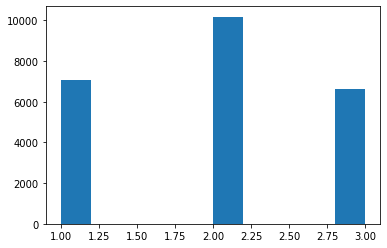

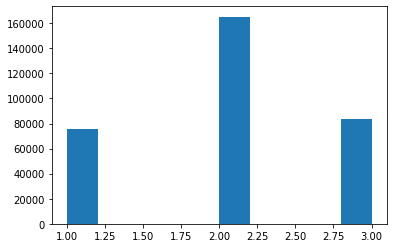

In [18]:

mask = [ (np.isnan(df_train['aurora_type'])==False) & (df_train['aurora_type'] != 5 ) ]
df_train_clean = df_train[mask[0]].copy(deep=True)
print((mask[0].any())==False)
mask = [ (np.isnan(df_val['aurora_type'])==False) & (df_val['aurora_type'] != 5 ) ]
df_val_clean = df_val[mask[0]].copy(deep=True)



# Construct X and y
feature_cols = [c for c in df_train_clean.columns if not 'ELE' in c]
from sklearn import preprocessing
X_val = df_val_clean[feature_cols].copy(deep=True)
y_val = df_val_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_clean[feature_cols].copy(deep=True)
y_train = df_train_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))


X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

Y = np.array(y_train_log, dtype=np.float32)

X_train_no_aurora_type = X_train.drop(columns='aurora_type')
X_val_no_aurora_type = X_val.drop(columns='aurora_type')
scaler_X = scaler_X.fit(X_train_no_aurora_type.values)
X_val_no_aurora_type_scaled = scaler_X.transform(X_val_no_aurora_type.values)
print(X_val_no_aurora_type_scaled.shape)
X_train_no_aurora_type_scaled = scaler_X.transform(X_train_no_aurora_type.values)

y_train_aurora_type = X_train['aurora_type']
y_val_aurora_type = X_val['aurora_type']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(y_train_aurora_type)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded = label_encoder.fit_transform(y_val_aurora_type)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)

print(X_train_no_aurora_type_scaled.shape)

print(y_train_aurora_type.shape)
print(y_train_aurora_type_encoded.shape)

sum(df_val_clean['aurora_type']==2)/df_val_clean.shape[0]
sum(df_train_clean['aurora_type']==2)/df_train_clean.shape[0]

print('equatorial', sum(df_train['aurora_type']==2)/df_train['aurora_type'].shape[0])
print('auroral', sum(df_train['aurora_type']==1)/df_train['aurora_type'].shape[0])
print('polar', sum(df_train['aurora_type']==3)/df_train['aurora_type'].shape[0])

plt.hist(y_val_aurora_type)
plt.show()
plt.hist(y_train_aurora_type)
plt.show()

In [19]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))

# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3,activation='softmax'))

# #compile model using accuracy to measure model performance
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam',  metrics=['accuracy'])

# history = model.fit(X_train_no_aurora_type_scaled, y_train_aurora_type_encoded, validation_data=(X_val_no_aurora_type_scaled, y_val_aurora_type_encoded), batch_size=32,epochs=75)

In [20]:
# filename = 'best_auroral_region_predictor'

# # model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# model.save_weights('best_auroral_region_predictor_weights.h5')

746/746 [==============================] - 1s 1ms/step - loss: 0.1872 - accuracy: 0.9190


W0803 10:54:20.891463 140316517320512 deprecation.py:323] From <ipython-input-21-517d4edcdd71>:9: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


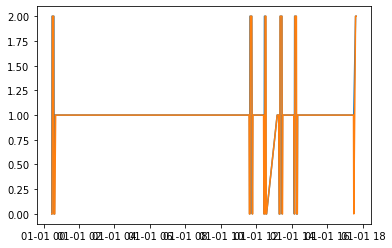

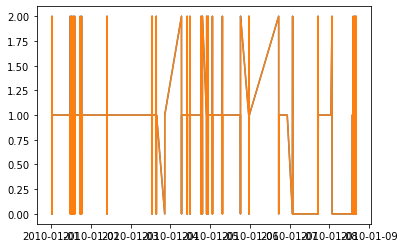

In [21]:
filename = 'best_auroral_region_predictor'

model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# model.save_weights('best_auroral_region_predictor_weights.h5')

model.evaluate(X_val_no_aurora_type_scaled, y_val_aurora_type_encoded)

results = (model.predict_classes(X_val_no_aurora_type_scaled))#, y_val_log.values)#, batch_size=128)

df_results = pd.DataFrame(data=results, index = X_val.index)
val = pd.DataFrame(data=integer_encoded_val, index = X_val.index)
# plt.figure()

# plt.plot( integer_encoded_val[:3000])
# plt.plot(results[:3000])
# plt.show()
plt.figure()

plt.plot( val[:100])
plt.plot(df_results[:100])
plt.show()

plt.figure()

plt.plot( val[:500])
plt.plot(df_results[:500])
plt.show()

# Now use this Auroal region predictor model to predict what type the "unknown/unspecified" regions are.  Then combine this predicted data with the known training and test data

In [22]:
 
mask = [ (np.isnan(df_train['aurora_type'])==True) | (df_train['aurora_type'] == 5 ) ]
df_train_pred = df_train[mask[0]].copy(deep=True)
print((mask[0].any())==False)
mask = [ (np.isnan(df_val['aurora_type'])==True) | (df_val['aurora_type'] == 5 ) ]
df_val_pred = df_val[mask[0]].copy(deep=True)
print(df_train_pred.shape)
print(df_val_pred.shape)

False
(397248, 150)
(31362, 150)


In [23]:
# Construct X and y
feature_cols = [c for c in df_train_pred.columns if (not ( 'ELE' in c) | ('aurora_type' in c))]
X_train = df_train_pred[feature_cols].copy(deep=True)
X_val = df_val_pred[feature_cols].copy(deep=True)
print(X_train.shape)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)
#scaler_X = scaler_X.fit(X_train_no_aurora_type.values)



(397248, 148)


(397248, 148)
(324651,)
(397248, 150)
(397248, 150)
(324651, 150)
(55210, 150)


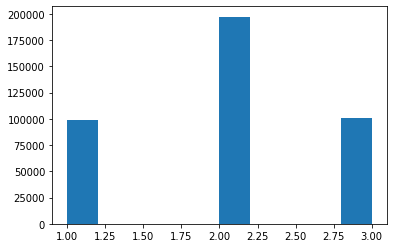

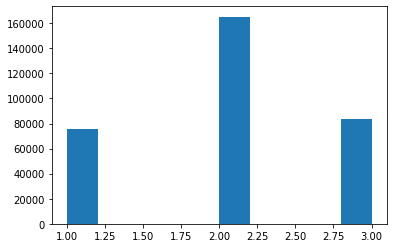

In [24]:
print(X.shape)

print((model.predict_classes(X_train_no_aurora_type_scaled)).shape)
print(df_train_pred.shape)

df_train_pred['aurora_type']= model.predict_classes(X)+1
df_val_pred['aurora_type']= model.predict_classes(X_test)+1

plt.figure()
plt.hist(df_train_pred['aurora_type'])
plt.figure()
plt.hist(df_train_clean['aurora_type'])

print(df_train_pred.shape)
print(df_train_clean.shape)

frames = [df_train_clean, df_train_pred]
df_train_new = pd.concat(frames)
frames = [df_val_clean, df_val_pred]
df_val_new = pd.concat(frames) 

print(df_val_new.values.shape)

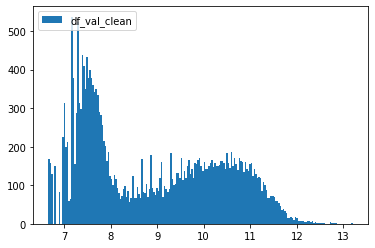

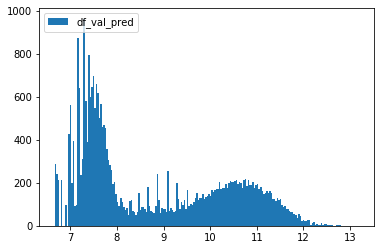

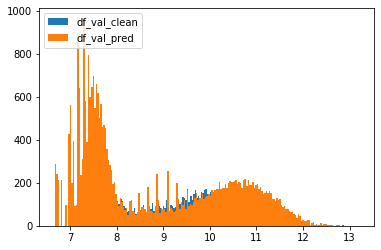

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


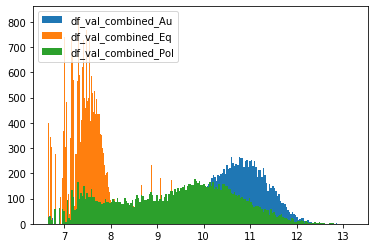

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10


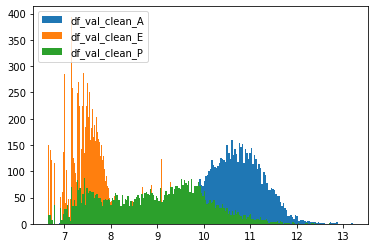

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


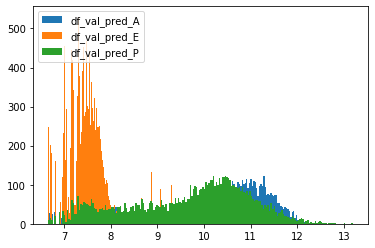

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log10


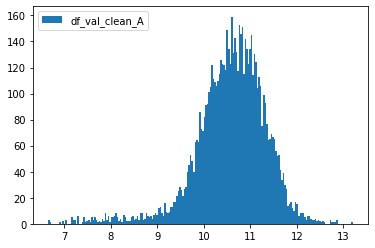

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10


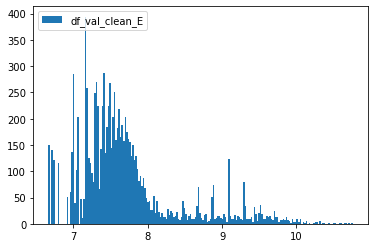

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in log10


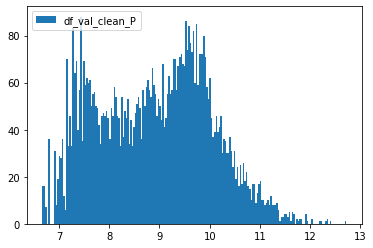

In [25]:
plt.figure()
plt.hist(np.log10(df_val_clean['ELE_TOTAL_ENERGY_FLUX']),bins=200)
plt.legend(['df_val_clean'], loc='upper left')
plt.show()

plt.figure()
plt.hist(np.log10(df_val_pred['ELE_TOTAL_ENERGY_FLUX']),bins=200)
plt.legend(['df_val_pred'], loc='upper left')
plt.show()


plt.figure()
plt.hist(np.log10(df_val_clean['ELE_TOTAL_ENERGY_FLUX']),bins=200)
plt.hist(np.log10(df_val_pred['ELE_TOTAL_ENERGY_FLUX']),bins=200)
plt.legend(['df_val_clean', 'df_val_pred'], loc='upper left')
plt.show()

plt.figure()
mask = [ df_val_new['aurora_type']==1]
plt.hist(np.log10(df_val_new[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
mask = [ df_val_new['aurora_type']==2]
plt.hist(np.log10(df_val_new[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
mask = [ df_val_new['aurora_type']==3]
plt.hist(np.log10(df_val_new[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
plt.legend(['df_val_combined_Au', 'df_val_combined_Eq', 'df_val_combined_Pol'], loc='upper left')
plt.show()

plt.figure()
mask = [ df_val_clean['aurora_type']==1]
plt.hist(np.log10(df_val_clean[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
mask = [ df_val_clean['aurora_type']==2]
plt.hist(np.log10(df_val_clean[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
mask = [ df_val_clean['aurora_type']==3]
plt.hist(np.log10(df_val_clean[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
plt.legend(['df_val_clean_A', 'df_val_clean_E', 'df_val_clean_P'], loc='upper left')
plt.show()

plt.figure()
mask = [ df_val_pred['aurora_type']==1]
plt.hist(np.log10(df_val_pred[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
mask = [ df_val_pred['aurora_type']==2]
plt.hist(np.log10(df_val_pred[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
mask = [ df_val_pred['aurora_type']==3]
plt.hist(np.log10(df_val_pred[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
plt.legend(['df_val_pred_A', 'df_val_pred_E', 'df_val_pred_P'], loc='upper left')
plt.show()

plt.figure()
mask = [ df_val_clean['aurora_type']==1]
plt.hist(np.log10(df_val_clean[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
plt.legend(['df_val_clean_A'], loc='upper left')
plt.show()

plt.figure()
mask = [ df_val_clean['aurora_type']==2]
plt.hist(np.log10(df_val_clean[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
plt.legend(['df_val_clean_E',], loc='upper left')
plt.show()

plt.figure()
mask = [ df_val_clean['aurora_type']==3]
plt.hist(np.log10(df_val_clean[mask[0]])['ELE_TOTAL_ENERGY_FLUX'],bins=200)
plt.legend([ 'df_val_clean_P'], loc='upper left')
plt.show()

In [26]:

# Construct X and y
feature_cols = [c for c in df_train_new.columns if not 'ELE' in c]

X_val = df_val_new[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_new[feature_cols].copy(deep=True)
y_train = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)


(array([174354.,      0.,      0.,      0.,      0., 362529.,      0.,
             0.,      0., 185016.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

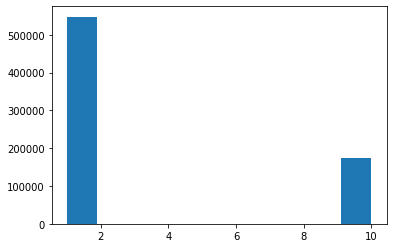

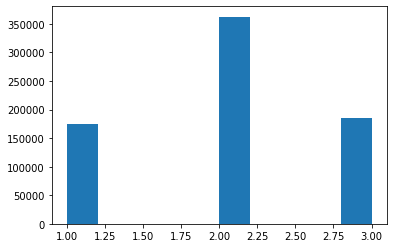

In [27]:
sample_weights = np.ones((X_train.values.shape[0]))
for i in range(0,X_train.values.shape[0]):
    if X_train['aurora_type'].values[i]==1:
        sample_weights[i]=10

plt.figure()
plt.hist(sample_weights)
plt.figure()
plt.hist(X_train['aurora_type'].values)

# Now with the supervised auroral type values and the predicted (unsupervised) type values as a new column in the input X, predict the scalar energy flux y

In [28]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1))


# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',  metrics=['mse','mae'])

# history = model.fit(X, np.array(y_train_log), 
#     validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000, sample_weight=sample_weights)

In [29]:
filename = 'best_with_auroral_region_weights'

# model.save(filename)

model = tensorflow.keras.models.load_model(filename)
#model.save_weights('my_model_weights.h5')


# print(history.history.keys())
# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][200:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [30]:
model.evaluate(X_val_scaled,y_val_log)



1726/1726 [==============================] - 2s 953us/step - loss: 0.5924 - mean_squared_error: 0.5924 - mean_absolute_error: 0.5501


[0.592354953289032, 0.592354953289032, 0.5500954389572144]

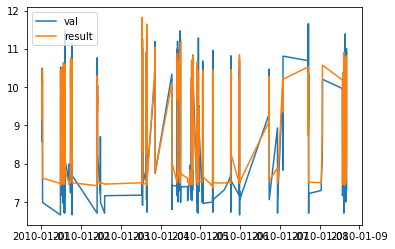

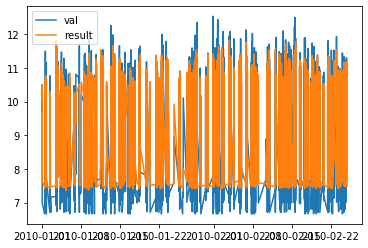

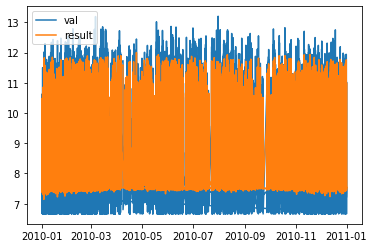

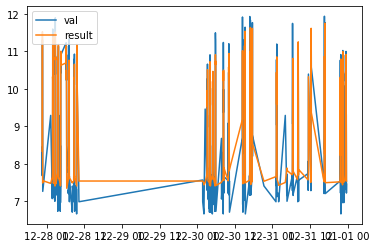

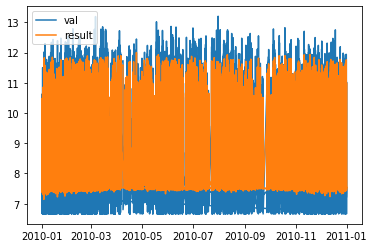

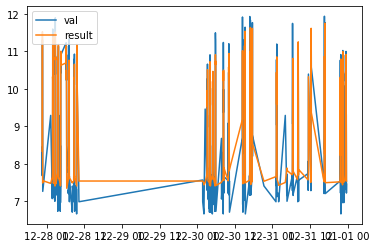

In [31]:
results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)

df_results = pd.DataFrame(data=results, index = X_val.index)

plt.figure()
plt.plot(y_val_log[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y_val_log[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

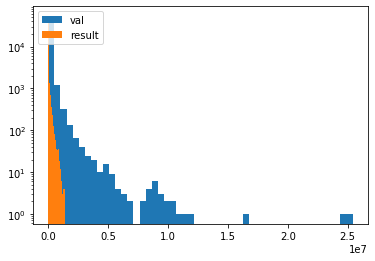

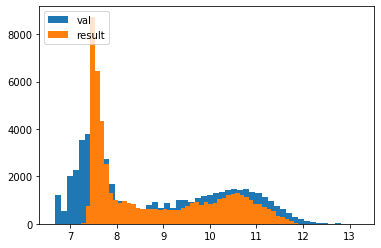

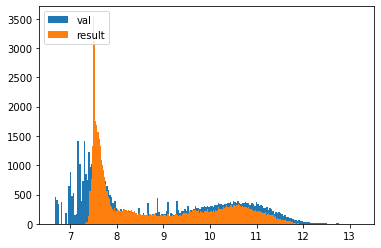

In [32]:


plt.figure()
plt.hist(10**y_val_log.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y_val_log.values[:],bins=50)
plt.hist(df_results.values,bins=50)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y_val_log.values[:],bins=200)
plt.hist(df_results.values,bins=200)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

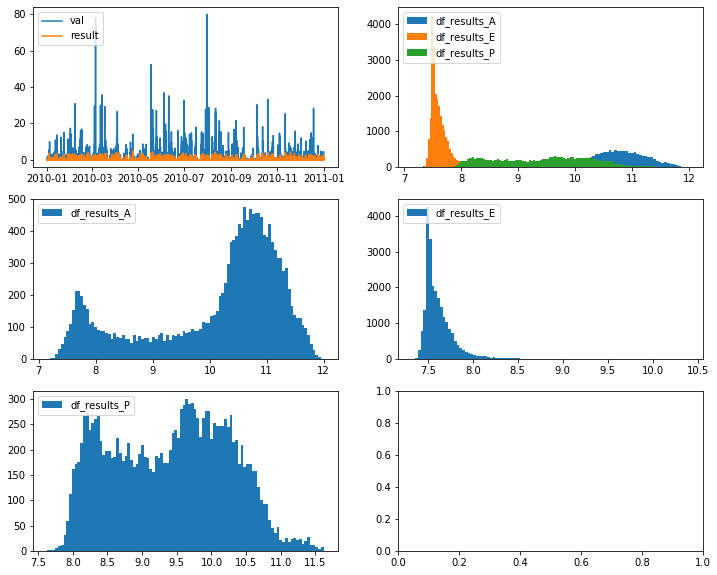

In [33]:
%matplotlib inline

fig, axs = plt.subplots(3, 2, figsize=(12,10))

axs[0, 0].plot(10**y_val_log[:]*1.6*3.14159e-12)
axs[0, 0].plot(10**df_results[:]*1.6*3.14159e-12)
axs[0, 0].legend(['val', 'result'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[0, 1].hist((df_results.values[[mask[0].values]]),bins=100)
mask = [ df_val_new['aurora_type']==2]
axs[0, 1].hist((df_results.values[[mask[0].values]]),bins=100)
mask = [ df_val_new['aurora_type']==3]
axs[0, 1].hist((df_results.values[[mask[0].values]]),bins=100)
axs[0, 1].legend(['df_results_A', 'df_results_E', 'df_results_P'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[1, 0].hist((df_results.values[[mask[0].values]]),bins=100)
axs[1, 0].legend(['df_results_A'], loc='upper left')

mask = [ df_val_new['aurora_type']==2]
axs[1, 1].hist((df_results.values[[mask[0].values]]),bins=100)
axs[1, 1].legend(['df_results_E',], loc='upper left')

mask = [ df_val_new['aurora_type']==3]
axs[2, 0].hist((df_results.values[[mask[0].values]]),bins=100)
axs[2, 0].legend([ 'df_results_P'], loc='upper left')
plt.show()

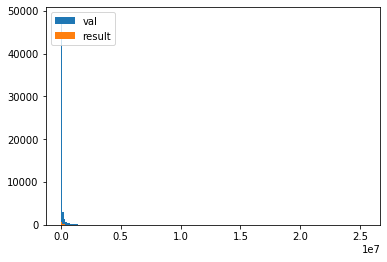

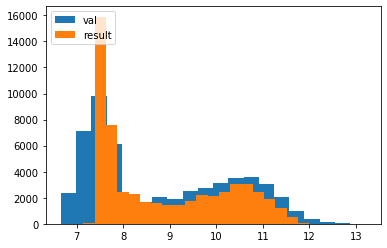

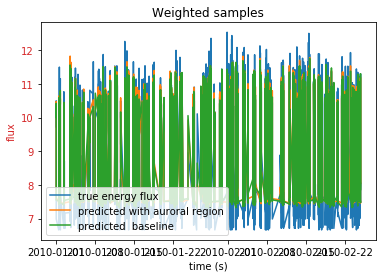

In [34]:

filename = 'best_with_auroral_region_weights'
model = tensorflow.keras.models.load_model(filename)
results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)

indices = np.array(np.linspace(35,80,num=80-35+1,dtype=np.int))


plt.figure()
plt.hist(10**y_val_log[:]*1.6e-6,bins=200)
plt.hist(10**df_results.values*1.6e-6,bins=200)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y_val_log[:],bins=20)
plt.hist(df_results.values,bins=20)
plt.legend(['val', 'result'], loc='upper left')
plt.show()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('flux', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(y_val_log[:5000])
ax1.plot(df_results[:5000])


filename = 'best_base_line'
model = tensorflow.keras.models.load_model(filename)
results = model.predict(X_val_scaled[:,:148])#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)

ax1.plot(df_results[:5000])

ax1.legend(['true energy flux', 'predicted with auroral region', 'predicted  baseline'], loc='lower left')
plt.title('Weighted samples')
plt.show()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('MLat', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(X_val['SC_AACGM_LAT'][:5000], color=color)
ax1.legend(['true energy flux', 'predicted with auroral region', 'predicted  baseline'], loc='lower left')


fig.tight_layout()  # otherwise the right y-label is slightly clipped


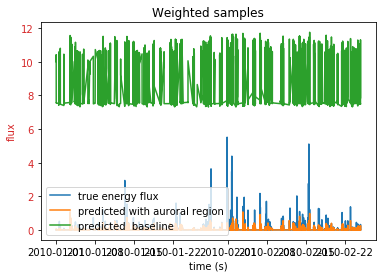

In [35]:


filename = 'best_with_auroral_region_weights'
model = tensorflow.keras.models.load_model(filename)
results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)

indices = np.array(np.linspace(35,80,num=80-35+1,dtype=np.int))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('flux', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(10**y_val_log[:5000]*1.6e-12)
ax1.plot(10**df_results[:5000]*1.6e-12)


filename = 'best_base_line'
model = tensorflow.keras.models.load_model(filename)
results = model.predict(X_val_scaled[:,:148])#, y_val_log.values)#, batch_size=128)
df_results = pd.DataFrame(data=results, index = X_val.index)

ax1.plot(df_results[:5000])

ax1.legend(['true energy flux', 'predicted with auroral region', 'predicted  baseline'], loc='lower left')
plt.title('Weighted samples')
plt.show()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('MLat', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(X_val['SC_AACGM_LAT'][:5000], color=color)
ax1.legend(['true energy flux', 'predicted with auroral region', 'predicted  baseline'], loc='lower left')


fig.tight_layout()  # otherwise the right y-label is slightly clipped


# Now with the supervised auroral type values and the predicted (unsupervised) type values as a new column in the input X, predict the scalar energy flux y

# The target Y is now a vector result where the true value only has one of the three as non-zero, the correct answer is specified by the auroral region type, equatorial region, in aurora, and the polar region

# The loss is the MSE of all three, to compare this loss to the previous approach that is signal modal, multiply the loss by the number of modes which is three

(array([174354.,      0.,      0.,      0.,      0., 362529.,      0.,
             0.,      0., 185016.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

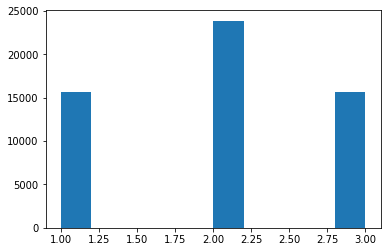

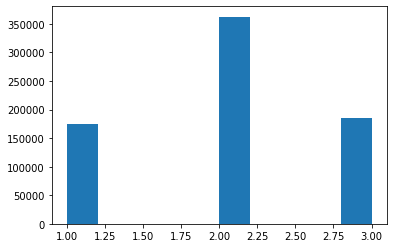

In [36]:

# Construct X and y
feature_cols = [c for c in df_train_new.columns if not 'ELE' in c]
X_val = df_val_new[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_new[feature_cols].copy(deep=True)
y_train_val = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log1 = np.log10(y_train.copy(deep=True))
y_val_log1 = np.log10(y_val.copy(deep=True))

y_train_log = np.zeros((y_train_log1.values.shape[0],3))
y_val_log = np.zeros((y_val_log1.values.shape[0],3))

for i in range(0,X_val.values.shape[0]):
    if X_val['aurora_type'].values[i] == 1:
        y_val_log[i,0]=y_val_log1.values[i]-11.
    if X_val['aurora_type'].values[i] == 2:
        y_val_log[i,1]=y_val_log1.values[i]-7.5
    if X_val['aurora_type'].values[i] == 3:
        y_val_log[i,2]=y_val_log1.values[i]-10.
for i in range(0,X_train.values.shape[0]):
    if X_train['aurora_type'].values[i] == 1:
        y_train_log[i,0]=y_train_log1.values[i]-11.
    if X_train['aurora_type'].values[i] == 2:
        y_train_log[i,1]=y_train_log1.values[i]-7.5
    if X_train['aurora_type'].values[i] == 3:
        y_train_log[i,2]=y_train_log1.values[i]-10.



scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

plt.figure()
plt.hist(X_val['aurora_type'].values)
plt.figure()
plt.hist(X_train['aurora_type'].values)

In [37]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3))


# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

# history = model.fit(X, np.array(y_train_log), 
#                     validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=300, sample_weight=sample_weights)

In [38]:
# filename = 'best_with_auroral_region4_weighted_residual'

# model.save(filename)
# # model.save_weights('my_model_weights2.h5')

In [39]:
filename = 'best_with_auroral_region4_weighted_residual'
# filename = 'best_with_auroral_region4_weighted_residual'

# model.save(filename)
model = tensorflow.keras.models.load_model(filename)

model.evaluate(X_val_scaled,np.array(y_val_log))


# print(history.history.keys())
# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][200:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

1726/1726 [==============================] - 1s 817us/step - loss: 0.1946 - mean_squared_error: 0.1946


[0.19459116458892822, 0.19459116458892822]

55210
(55210,)


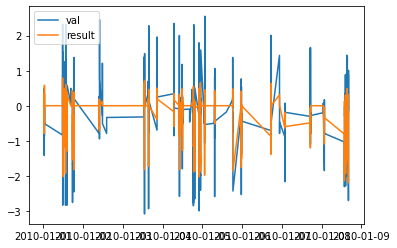

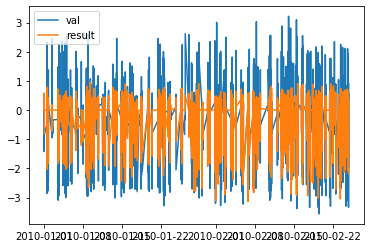

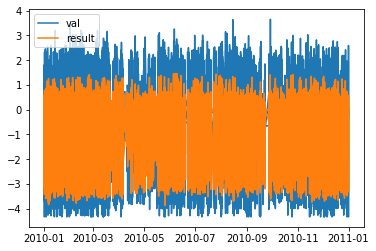

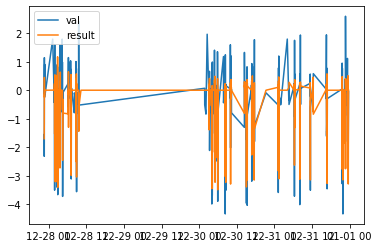

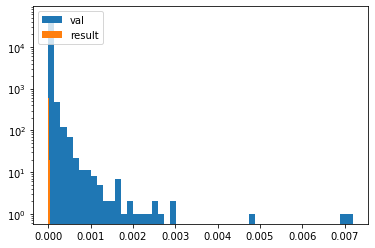

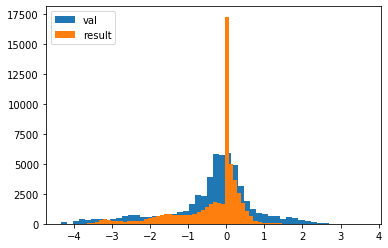

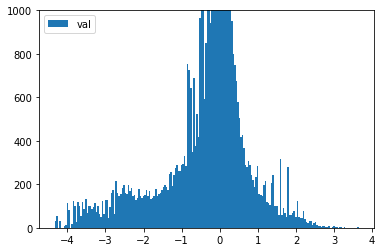

In [40]:
%matplotlib inline

results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.sum(results1[i,:])
    y[i] = np.sum(y_val_log[i,:])
    
df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=50)
plt.hist(df_results.values,bins=50)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=200)
#plt.hist(df_results.values,bins=200)
plt.legend(['val', 'result'], loc='upper left')
plt.ylim([0,1000])
plt.show()

In [41]:
mse_final = np.average((df_results.values-y.values)**2)
print(mse_final)

0.5832610185507521


In [42]:

%matplotlib inline



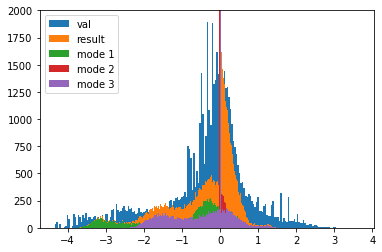

In [43]:
plt.figure()
plt.hist(y.values[:],bins=200)
plt.hist(df_results.values,bins=200)
plt.hist(results1[:,0],bins=200)
plt.hist(results1[:,1],bins=200)
plt.hist(results1[:,2],bins=200)
plt.legend(['val', 'result', 'mode 1', 'mode 2', 'mode 3'], loc='upper left')
# plt.xlim([6,13])
plt.ylim([0,2000])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

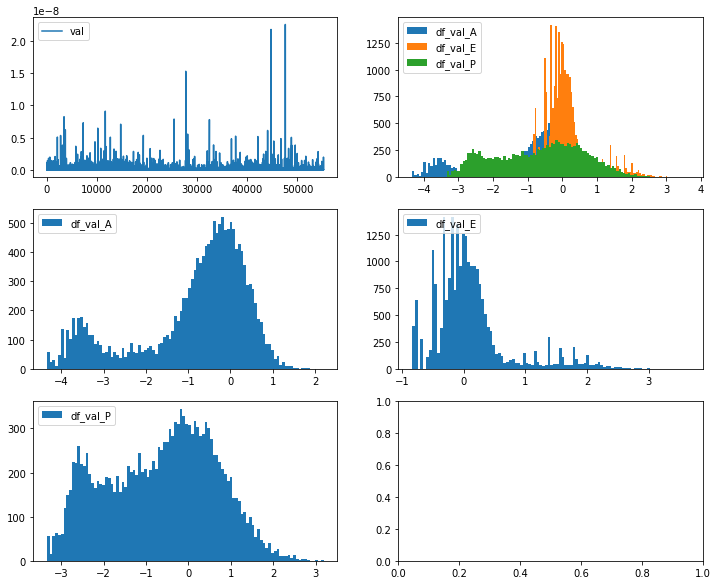

In [44]:
%matplotlib inline

fig, axs = plt.subplots(3, 2, figsize=(12,10))

axs[0, 0].plot(10**y.values*1.6*3.14159e-12)
axs[0, 0].legend(['val'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[0, 1].hist((y.values[[mask[0].values]]),bins=100)
mask = [ df_val_new['aurora_type']==2]
axs[0, 1].hist((y.values[[mask[0].values]]),bins=100)
mask = [ df_val_new['aurora_type']==3]
axs[0, 1].hist((y.values[[mask[0].values]]),bins=100)
axs[0, 1].legend(['df_val_A', 'df_val_E', 'df_val_P'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[1, 0].hist((y.values[[mask[0].values]]),bins=100)
axs[1, 0].legend(['df_val_A'], loc='upper left')

mask = [ df_val_new['aurora_type']==2]
axs[1, 1].hist((y.values[[mask[0].values]]),bins=100)
axs[1, 1].legend(['df_val_E',], loc='upper left')

mask = [ df_val_new['aurora_type']==3]
axs[2, 0].hist((y.values[[mask[0].values]]),bins=100)
axs[2, 0].legend([ 'df_val_P'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packag

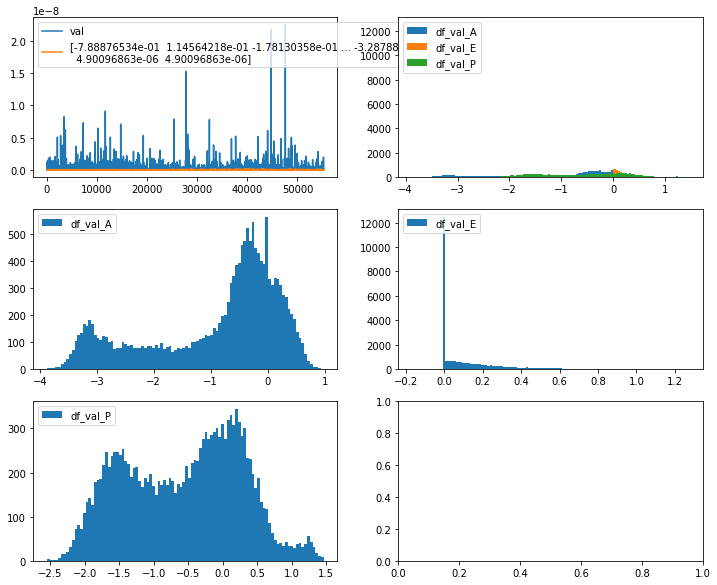

In [45]:
%matplotlib inline

fig, axs = plt.subplots(3, 2, figsize=(12,10))
axs[0, 0].plot(10**y.values*1.6*3.14159e-12)

axs[0, 0].plot(10**df_results.values*1.6*3.14159e-12)
axs[0, 0].legend(['val',results], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[0, 1].hist((df_results.values[[mask[0].values]]),bins=100)
mask = [ df_val_new['aurora_type']==2]
axs[0, 1].hist((df_results.values[[mask[0].values]]),bins=100)
mask = [ df_val_new['aurora_type']==3]
axs[0, 1].hist((df_results.values[[mask[0].values]]),bins=100)
axs[0, 1].legend(['df_val_A', 'df_val_E', 'df_val_P'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[1, 0].hist((df_results.values[[mask[0].values]]),bins=100)
axs[1, 0].legend(['df_val_A'], loc='upper left')

mask = [ df_val_new['aurora_type']==2]
axs[1, 1].hist((df_results.values[[mask[0].values]]),bins=100)
axs[1, 1].legend(['df_val_E',], loc='upper left')

mask = [ df_val_new['aurora_type']==3]
axs[2, 0].hist((df_results.values[[mask[0].values]]),bins=100)
axs[2, 0].legend([ 'df_val_P'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

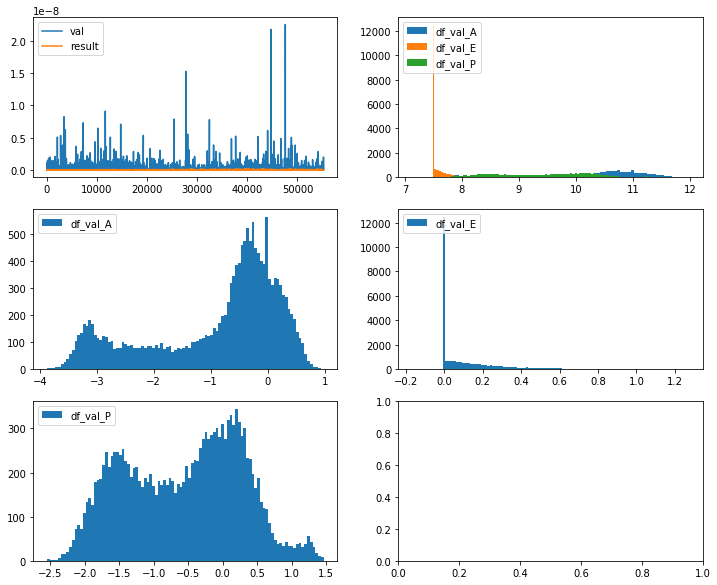

In [46]:
%matplotlib inline

fig, axs = plt.subplots(3, 2, figsize=(12,10))

axs[0, 0].plot(10**y.values*1.6*3.14159e-12)
axs[0, 0].plot(10**df_results.values*1.6*3.14159e-12)
axs[0, 0].legend(['val','result'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[0, 1].hist((df_results.values[[mask[0].values]]+11),bins=100)
mask = [ df_val_new['aurora_type']==2]
axs[0, 1].hist((df_results.values[[mask[0].values]]+7.5),bins=100)
mask = [ df_val_new['aurora_type']==3]
axs[0, 1].hist((df_results.values[[mask[0].values]]+10),bins=100)
axs[0, 1].legend(['df_val_A', 'df_val_E', 'df_val_P'], loc='upper left')

mask = [ df_val_new['aurora_type']==1]
axs[1, 0].hist((df_results.values[[mask[0].values]]),bins=100)
axs[1, 0].legend(['df_val_A'], loc='upper left')

mask = [ df_val_new['aurora_type']==2]
axs[1, 1].hist((df_results.values[[mask[0].values]]),bins=100)
axs[1, 1].legend(['df_val_E',], loc='upper left')

mask = [ df_val_new['aurora_type']==3]
axs[2, 0].hist((df_results.values[[mask[0].values]]),bins=100)
axs[2, 0].legend([ 'df_val_P'], loc='upper left')
plt.show()

In [47]:
# Now do it with 3 classification classes and one residual class

In [48]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(df_train_new['aurora_type'])
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(df_train_new['aurora_type']), 1)
print(integer_encoded_train.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)

integer_encoded = label_encoder.fit_transform(df_val_new['aurora_type'])
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)


(721899,)
(721899, 1)


In [49]:
y_train_log1 = np.log10(df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True))
y_val_log1 = np.log10(df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True))

y_train_log_res = np.zeros((y_train_log1.values.shape[0]))
y_val_log_res = np.zeros((y_val_log1.values.shape[0]))

for i in range(0,X_val.values.shape[0]):
    if X_val['aurora_type'].values[i] == 1:
        y_val_log_res[i]=y_val_log1.values[i]-11.
    if X_val['aurora_type'].values[i] == 2:
        y_val_log_res[i]=y_val_log1.values[i]-7.5
    if X_val['aurora_type'].values[i] == 3:
        y_val_log_res[i]=y_val_log1.values[i]-10.
for i in range(0,X_train.values.shape[0]):
    if X_train['aurora_type'].values[i] == 1:
        y_train_log_res[i]=y_train_log1.values[i]-11.
    if X_train['aurora_type'].values[i] == 2:
        y_train_log_res[i]=y_train_log1.values[i]-7.5
    if X_train['aurora_type'].values[i] == 3:
        y_train_log_res[i]=y_train_log1.values[i]-10.

In [50]:
input1 = Input(shape=(148))
model1 = Dense(int(256), activation='relu')(input1)
model1 = Dropout(.5)(model1)
model1 = Dense(64, activation='relu')(model1)
model1 = Dense(16, activation='relu')(model1)
merged = Dense(4, activation='relu')(model1)

output1 = Dense(3, activation='softmax')(model1)
output2 = Dense(1)(model1)

model = tensorflow.keras.models.Model(inputs=input1, outputs=[output1, output2])
#compile model using accuracy to measure model performance
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
model.summary()
history = model.fit(X[:,:148], 
                    [y_train_aurora_type_encoded, y_train_log_res], 
                    validation_data=(
                        X_test[:,:148], 
                        [y_val_aurora_type_encoded, y_val_log_res] 
                                    ),
                    batch_size=1024,epochs=100)#, sample_weight=sample_weights)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 148)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          38144       input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256)          0           dense[0][0]                      
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           16448       dropout[0][0]                    
______________________________________________________________________________________________

705/705 [==============================] - 1s 2ms/step - loss: 0.8176 - dense_4_loss: 0.0470 - dense_5_loss: 0.7705 - dense_4_mse: 0.0470 - dense_5_mse: 0.7705 - val_loss: 0.9521 - val_dense_4_loss: 0.0500 - val_dense_5_loss: 0.9022 - val_dense_4_mse: 0.0500 - val_dense_5_mse: 0.9022
Epoch 23/100
705/705 [==============================] - 1s 2ms/step - loss: 0.8157 - dense_4_loss: 0.0468 - dense_5_loss: 0.7689 - dense_4_mse: 0.0468 - dense_5_mse: 0.7689 - val_loss: 1.0044 - val_dense_4_loss: 0.0562 - val_dense_5_loss: 0.9482 - val_dense_4_mse: 0.0562 - val_dense_5_mse: 0.9482
Epoch 24/100
705/705 [==============================] - 1s 2ms/step - loss: 0.8126 - dense_4_loss: 0.0466 - dense_5_loss: 0.7661 - dense_4_mse: 0.0466 - dense_5_mse: 0.7661 - val_loss: 0.9751 - val_dense_4_loss: 0.0505 - val_dense_5_loss: 0.9247 - val_dense_4_mse: 0.0505 - val_dense_5_mse: 0.9247
Epoch 25/100
705/705 [==============================] - 1s 2ms/step - loss: 0.8126 - dense_4_loss: 0.0465 - dense_5_los

705/705 [==============================] - 1s 2ms/step - loss: 0.7846 - dense_4_loss: 0.0444 - dense_5_loss: 0.7402 - dense_4_mse: 0.0444 - dense_5_mse: 0.7402 - val_loss: 1.0022 - val_dense_4_loss: 0.0499 - val_dense_5_loss: 0.9523 - val_dense_4_mse: 0.0499 - val_dense_5_mse: 0.9523
Epoch 50/100
705/705 [==============================] - 1s 2ms/step - loss: 0.7831 - dense_4_loss: 0.0444 - dense_5_loss: 0.7387 - dense_4_mse: 0.0444 - dense_5_mse: 0.7387 - val_loss: 0.9643 - val_dense_4_loss: 0.0495 - val_dense_5_loss: 0.9148 - val_dense_4_mse: 0.0495 - val_dense_5_mse: 0.9148
Epoch 51/100
705/705 [==============================] - 1s 2ms/step - loss: 0.7813 - dense_4_loss: 0.0443 - dense_5_loss: 0.7370 - dense_4_mse: 0.0443 - dense_5_mse: 0.7370 - val_loss: 1.0270 - val_dense_4_loss: 0.0511 - val_dense_5_loss: 0.9759 - val_dense_4_mse: 0.0511 - val_dense_5_mse: 0.9759
Epoch 52/100
705/705 [==============================] - 1s 2ms/step - loss: 0.7812 - dense_4_loss: 0.0443 - dense_5_los

705/705 [==============================] - 1s 2ms/step - loss: 0.7666 - dense_4_loss: 0.0432 - dense_5_loss: 0.7234 - dense_4_mse: 0.0432 - dense_5_mse: 0.7234 - val_loss: 0.9781 - val_dense_4_loss: 0.0525 - val_dense_5_loss: 0.9256 - val_dense_4_mse: 0.0525 - val_dense_5_mse: 0.9256
Epoch 77/100
705/705 [==============================] - 1s 2ms/step - loss: 0.7657 - dense_4_loss: 0.0433 - dense_5_loss: 0.7224 - dense_4_mse: 0.0433 - dense_5_mse: 0.7224 - val_loss: 1.0052 - val_dense_4_loss: 0.0517 - val_dense_5_loss: 0.9535 - val_dense_4_mse: 0.0517 - val_dense_5_mse: 0.9535
Epoch 78/100
705/705 [==============================] - 1s 2ms/step - loss: 0.7676 - dense_4_loss: 0.0433 - dense_5_loss: 0.7243 - dense_4_mse: 0.0433 - dense_5_mse: 0.7243 - val_loss: 0.9945 - val_dense_4_loss: 0.0506 - val_dense_5_loss: 0.9438 - val_dense_4_mse: 0.0506 - val_dense_5_mse: 0.9438
Epoch 79/100
705/705 [==============================] - 1s 2ms/step - loss: 0.7659 - dense_4_loss: 0.0434 - dense_5_los

W0803 10:57:48.981174 140316517320512 deprecation.py:506] From /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


1726/1726 [==============================] - 2s 1ms/step - loss: 2.9659 - dense_4_loss: 2.0144 - dense_5_loss: 0.9515 - dense_4_mean_squared_error: 2.0144 - dense_5_mean_squared_error: 0.9515
dict_keys(['loss', 'dense_4_loss', 'dense_5_loss', 'dense_4_mse', 'dense_5_mse', 'val_loss', 'val_dense_4_loss', 'val_dense_5_loss', 'val_dense_4_mse', 'val_dense_5_mse'])


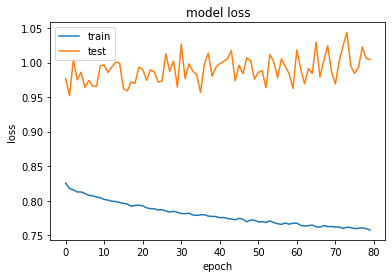

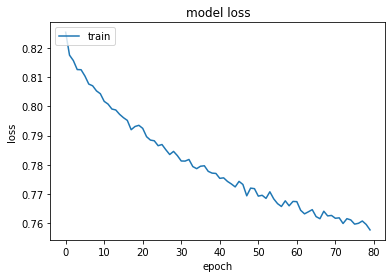

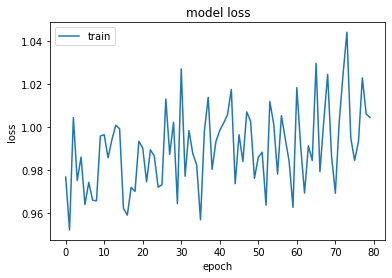

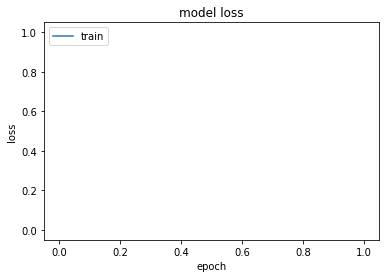

In [51]:
filename = 'class_and_regression_residual'

model.save(filename)
model = tensorflow.keras.models.load_model(filename)

model.evaluate(X_test[:,:148],np.array(y_val_log_res))


print(history.history.keys())
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(55210, 1)


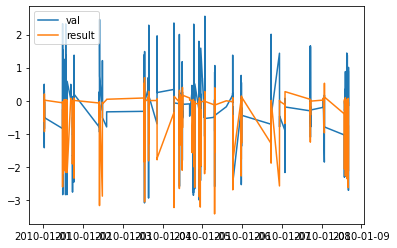

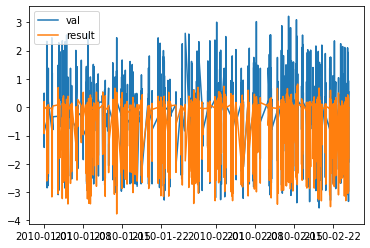

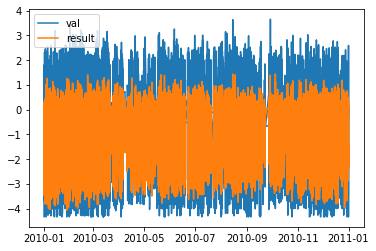

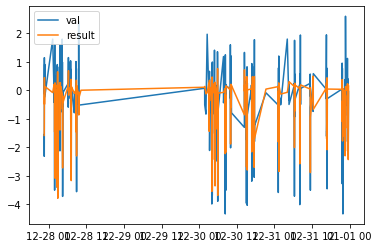

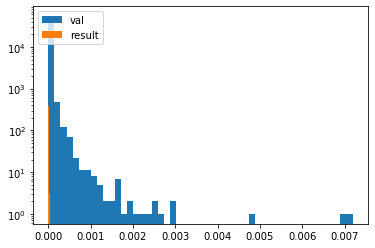

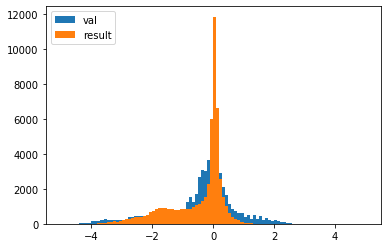

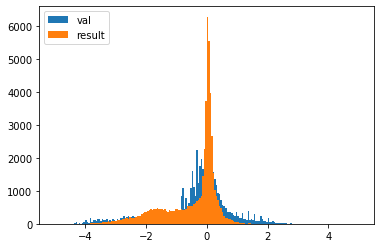

In [52]:
%matplotlib inline

results = model.predict(X_test[:,:148])#, y_val_log.values)#, batch_size=128)
print(results[1].shape)
df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log_res, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=200,range=(-5,5))
plt.hist(df_results.values,bins=200,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

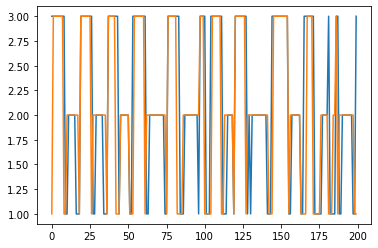

In [53]:
plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [54]:
input1 = Input(shape=(148))
model1 = Dense(int(256),  kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = tf.keras.layers.AlphaDropout(.5)(model1)
model1 = Dense(64, kernel_initializer='lecun_normal', activation='selu')(model1)
model1 = Dense(16,  kernel_initializer='lecun_normal', activation='selu')(model1)
merged = Dense(4, kernel_initializer='lecun_normal', activation='selu')(model1)

output1 = Dense(3, activation='softmax',name="class_output")(model1)
output2 = Dense(1,  kernel_initializer='lecun_normal', activation='selu',name="residual")(model1)

model = tensorflow.keras.models.Model(inputs=input1, outputs=[output1, output2])
#compile model using accuracy to measure model performance
# losses = {"class_output": "categorical_crossentropy", "residual": "mse",
# }
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
model.summary()
history = model.fit(X[:,:148], 
                    [y_train_aurora_type_encoded, y_train_log_res], 
                    validation_data=(
                        X_test[:,:148], 
                        [y_val_aurora_type_encoded, y_val_log_res] 
                                    ),
                    batch_size=1024,epochs=300)#, sample_weight=sample_weights)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 148)]        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 256)          38144       input_2[0][0]                    
__________________________________________________________________________________________________
alpha_dropout (AlphaDropout)    (None, 256)          0           dense_6[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 64)           16448       alpha_dropout[0][0]              
____________________________________________________________________________________________

Epoch 21/300
705/705 [==============================] - 1s 2ms/step - loss: 0.8610 - class_output_loss: 0.0473 - residual_loss: 0.8137 - class_output_mse: 0.0473 - residual_mse: 0.8137 - val_loss: 1.5150 - val_class_output_loss: 0.1065 - val_residual_loss: 1.4085 - val_class_output_mse: 0.1065 - val_residual_mse: 1.4085
Epoch 22/300
705/705 [==============================] - 2s 2ms/step - loss: 0.8564 - class_output_loss: 0.0470 - residual_loss: 0.8095 - class_output_mse: 0.0470 - residual_mse: 0.8095 - val_loss: 1.5821 - val_class_output_loss: 0.1106 - val_residual_loss: 1.4715 - val_class_output_mse: 0.1106 - val_residual_mse: 1.4715
Epoch 23/300
705/705 [==============================] - 2s 2ms/step - loss: 0.8534 - class_output_loss: 0.0468 - residual_loss: 0.8066 - class_output_mse: 0.0468 - residual_mse: 0.8066 - val_loss: 1.4757 - val_class_output_loss: 0.1083 - val_residual_loss: 1.3674 - val_class_output_mse: 0.1083 - val_residual_mse: 1.3674
Epoch 24/300
705/705 [============

705/705 [==============================] - 1s 2ms/step - loss: 0.8188 - class_output_loss: 0.0446 - residual_loss: 0.7741 - class_output_mse: 0.0446 - residual_mse: 0.7741 - val_loss: 1.3483 - val_class_output_loss: 0.1057 - val_residual_loss: 1.2426 - val_class_output_mse: 0.1057 - val_residual_mse: 1.2426
Epoch 47/300
705/705 [==============================] - 2s 2ms/step - loss: 0.8197 - class_output_loss: 0.0446 - residual_loss: 0.7751 - class_output_mse: 0.0446 - residual_mse: 0.7751 - val_loss: 1.3512 - val_class_output_loss: 0.0955 - val_residual_loss: 1.2557 - val_class_output_mse: 0.0955 - val_residual_mse: 1.2557
Epoch 48/300
705/705 [==============================] - 2s 2ms/step - loss: 0.8188 - class_output_loss: 0.0445 - residual_loss: 0.7743 - class_output_mse: 0.0445 - residual_mse: 0.7743 - val_loss: 1.3924 - val_class_output_loss: 0.0992 - val_residual_loss: 1.2932 - val_class_output_mse: 0.0992 - val_residual_mse: 1.2932
Epoch 49/300
705/705 [=========================

705/705 [==============================] - 2s 2ms/step - loss: 0.8039 - class_output_loss: 0.0435 - residual_loss: 0.7604 - class_output_mse: 0.0435 - residual_mse: 0.7604 - val_loss: 1.2817 - val_class_output_loss: 0.1101 - val_residual_loss: 1.1716 - val_class_output_mse: 0.1101 - val_residual_mse: 1.1716
Epoch 72/300
705/705 [==============================] - 2s 2ms/step - loss: 0.8028 - class_output_loss: 0.0436 - residual_loss: 0.7592 - class_output_mse: 0.0436 - residual_mse: 0.7592 - val_loss: 1.2868 - val_class_output_loss: 0.1030 - val_residual_loss: 1.1838 - val_class_output_mse: 0.1030 - val_residual_mse: 1.1838
Epoch 73/300
705/705 [==============================] - 2s 2ms/step - loss: 0.8039 - class_output_loss: 0.0437 - residual_loss: 0.7602 - class_output_mse: 0.0437 - residual_mse: 0.7602 - val_loss: 1.2561 - val_class_output_loss: 0.1059 - val_residual_loss: 1.1501 - val_class_output_mse: 0.1059 - val_residual_mse: 1.1501
Epoch 74/300
705/705 [=========================

705/705 [==============================] - 2s 2ms/step - loss: 0.7928 - class_output_loss: 0.0431 - residual_loss: 0.7497 - class_output_mse: 0.0431 - residual_mse: 0.7497 - val_loss: 1.2789 - val_class_output_loss: 0.1009 - val_residual_loss: 1.1780 - val_class_output_mse: 0.1009 - val_residual_mse: 1.1780
Epoch 97/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7939 - class_output_loss: 0.0430 - residual_loss: 0.7509 - class_output_mse: 0.0430 - residual_mse: 0.7509 - val_loss: 1.2474 - val_class_output_loss: 0.1130 - val_residual_loss: 1.1343 - val_class_output_mse: 0.1130 - val_residual_mse: 1.1343
Epoch 98/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7933 - class_output_loss: 0.0430 - residual_loss: 0.7503 - class_output_mse: 0.0430 - residual_mse: 0.7503 - val_loss: 1.2922 - val_class_output_loss: 0.1118 - val_residual_loss: 1.1804 - val_class_output_mse: 0.1118 - val_residual_mse: 1.1804
Epoch 99/300
705/705 [=========================

705/705 [==============================] - 2s 2ms/step - loss: 0.7878 - class_output_loss: 0.0427 - residual_loss: 0.7451 - class_output_mse: 0.0427 - residual_mse: 0.7451 - val_loss: 1.2729 - val_class_output_loss: 0.1117 - val_residual_loss: 1.1612 - val_class_output_mse: 0.1117 - val_residual_mse: 1.1612
Epoch 122/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7877 - class_output_loss: 0.0427 - residual_loss: 0.7450 - class_output_mse: 0.0427 - residual_mse: 0.7450 - val_loss: 1.2757 - val_class_output_loss: 0.1079 - val_residual_loss: 1.1678 - val_class_output_mse: 0.1079 - val_residual_mse: 1.1678
Epoch 123/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7861 - class_output_loss: 0.0426 - residual_loss: 0.7435 - class_output_mse: 0.0426 - residual_mse: 0.7435 - val_loss: 1.2855 - val_class_output_loss: 0.1099 - val_residual_loss: 1.1756 - val_class_output_mse: 0.1099 - val_residual_mse: 1.1756
Epoch 124/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7807 - class_output_loss: 0.0424 - residual_loss: 0.7383 - class_output_mse: 0.0424 - residual_mse: 0.7383 - val_loss: 1.3194 - val_class_output_loss: 0.1073 - val_residual_loss: 1.2121 - val_class_output_mse: 0.1073 - val_residual_mse: 1.2121
Epoch 147/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7817 - class_output_loss: 0.0423 - residual_loss: 0.7394 - class_output_mse: 0.0423 - residual_mse: 0.7394 - val_loss: 1.3321 - val_class_output_loss: 0.1158 - val_residual_loss: 1.2163 - val_class_output_mse: 0.1158 - val_residual_mse: 1.2163
Epoch 148/300
705/705 [==============================] - 1s 2ms/step - loss: 0.7811 - class_output_loss: 0.0423 - residual_loss: 0.7387 - class_output_mse: 0.0423 - residual_mse: 0.7387 - val_loss: 1.2295 - val_class_output_loss: 0.1163 - val_residual_loss: 1.1132 - val_class_output_mse: 0.1163 - val_residual_mse: 1.1132
Epoch 149/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7772 - class_output_loss: 0.0421 - residual_loss: 0.7351 - class_output_mse: 0.0421 - residual_mse: 0.7351 - val_loss: 1.2226 - val_class_output_loss: 0.1075 - val_residual_loss: 1.1151 - val_class_output_mse: 0.1075 - val_residual_mse: 1.1151
Epoch 172/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7774 - class_output_loss: 0.0421 - residual_loss: 0.7352 - class_output_mse: 0.0421 - residual_mse: 0.7352 - val_loss: 1.2784 - val_class_output_loss: 0.1072 - val_residual_loss: 1.1712 - val_class_output_mse: 0.1072 - val_residual_mse: 1.1712
Epoch 173/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7934 - class_output_loss: 0.0425 - residual_loss: 0.7508 - class_output_mse: 0.0425 - residual_mse: 0.7508 - val_loss: 1.4328 - val_class_output_loss: 0.1174 - val_residual_loss: 1.3153 - val_class_output_mse: 0.1174 - val_residual_mse: 1.3153
Epoch 174/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7745 - class_output_loss: 0.0420 - residual_loss: 0.7326 - class_output_mse: 0.0420 - residual_mse: 0.7326 - val_loss: 1.3056 - val_class_output_loss: 0.1080 - val_residual_loss: 1.1977 - val_class_output_mse: 0.1080 - val_residual_mse: 1.1977
Epoch 197/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7722 - class_output_loss: 0.0419 - residual_loss: 0.7303 - class_output_mse: 0.0419 - residual_mse: 0.7303 - val_loss: 1.2699 - val_class_output_loss: 0.1149 - val_residual_loss: 1.1550 - val_class_output_mse: 0.1149 - val_residual_mse: 1.1550
Epoch 198/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7726 - class_output_loss: 0.0419 - residual_loss: 0.7307 - class_output_mse: 0.0419 - residual_mse: 0.7307 - val_loss: 1.4079 - val_class_output_loss: 0.1063 - val_residual_loss: 1.3016 - val_class_output_mse: 0.1063 - val_residual_mse: 1.3016
Epoch 199/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7689 - class_output_loss: 0.0418 - residual_loss: 0.7270 - class_output_mse: 0.0418 - residual_mse: 0.7270 - val_loss: 1.2239 - val_class_output_loss: 0.1073 - val_residual_loss: 1.1166 - val_class_output_mse: 0.1073 - val_residual_mse: 1.1166
Epoch 222/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7708 - class_output_loss: 0.0419 - residual_loss: 0.7289 - class_output_mse: 0.0419 - residual_mse: 0.7289 - val_loss: 1.2209 - val_class_output_loss: 0.1069 - val_residual_loss: 1.1140 - val_class_output_mse: 0.1069 - val_residual_mse: 1.1140
Epoch 223/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7702 - class_output_loss: 0.0416 - residual_loss: 0.7286 - class_output_mse: 0.0416 - residual_mse: 0.7286 - val_loss: 1.2011 - val_class_output_loss: 0.1045 - val_residual_loss: 1.0966 - val_class_output_mse: 0.1045 - val_residual_mse: 1.0966
Epoch 224/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7669 - class_output_loss: 0.0416 - residual_loss: 0.7253 - class_output_mse: 0.0416 - residual_mse: 0.7253 - val_loss: 1.2378 - val_class_output_loss: 0.1083 - val_residual_loss: 1.1295 - val_class_output_mse: 0.1083 - val_residual_mse: 1.1295
Epoch 247/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7667 - class_output_loss: 0.0417 - residual_loss: 0.7249 - class_output_mse: 0.0417 - residual_mse: 0.7249 - val_loss: 1.2447 - val_class_output_loss: 0.1021 - val_residual_loss: 1.1426 - val_class_output_mse: 0.1021 - val_residual_mse: 1.1426
Epoch 248/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7666 - class_output_loss: 0.0416 - residual_loss: 0.7250 - class_output_mse: 0.0416 - residual_mse: 0.7250 - val_loss: 1.3232 - val_class_output_loss: 0.1092 - val_residual_loss: 1.2140 - val_class_output_mse: 0.1092 - val_residual_mse: 1.2140
Epoch 249/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7638 - class_output_loss: 0.0414 - residual_loss: 0.7224 - class_output_mse: 0.0414 - residual_mse: 0.7224 - val_loss: 1.2825 - val_class_output_loss: 0.1068 - val_residual_loss: 1.1757 - val_class_output_mse: 0.1068 - val_residual_mse: 1.1757
Epoch 272/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7638 - class_output_loss: 0.0414 - residual_loss: 0.7224 - class_output_mse: 0.0414 - residual_mse: 0.7224 - val_loss: 1.3375 - val_class_output_loss: 0.1042 - val_residual_loss: 1.2333 - val_class_output_mse: 0.1042 - val_residual_mse: 1.2333
Epoch 273/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7647 - class_output_loss: 0.0415 - residual_loss: 0.7232 - class_output_mse: 0.0415 - residual_mse: 0.7232 - val_loss: 1.3603 - val_class_output_loss: 0.1032 - val_residual_loss: 1.2570 - val_class_output_mse: 0.1032 - val_residual_mse: 1.2570
Epoch 274/300
705/705 [======================

705/705 [==============================] - 2s 2ms/step - loss: 0.7631 - class_output_loss: 0.0413 - residual_loss: 0.7218 - class_output_mse: 0.0413 - residual_mse: 0.7218 - val_loss: 1.3166 - val_class_output_loss: 0.1060 - val_residual_loss: 1.2106 - val_class_output_mse: 0.1060 - val_residual_mse: 1.2106
Epoch 297/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7623 - class_output_loss: 0.0413 - residual_loss: 0.7210 - class_output_mse: 0.0413 - residual_mse: 0.7210 - val_loss: 1.2504 - val_class_output_loss: 0.0996 - val_residual_loss: 1.1508 - val_class_output_mse: 0.0996 - val_residual_mse: 1.1508
Epoch 298/300
705/705 [==============================] - 2s 2ms/step - loss: 0.7621 - class_output_loss: 0.0414 - residual_loss: 0.7207 - class_output_mse: 0.0414 - residual_mse: 0.7207 - val_loss: 1.3360 - val_class_output_loss: 0.1076 - val_residual_loss: 1.2284 - val_class_output_mse: 0.1076 - val_residual_mse: 1.2284
Epoch 299/300
705/705 [======================

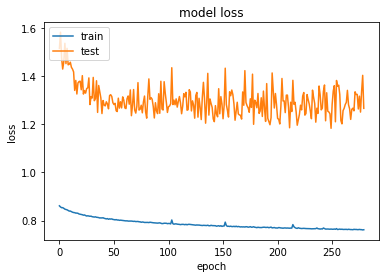

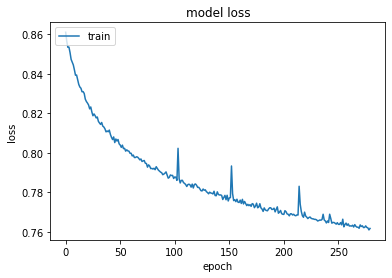

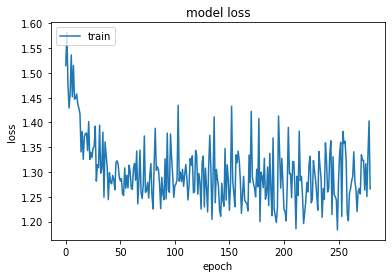

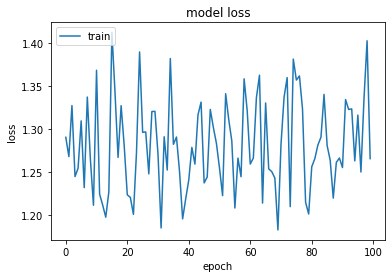

(55210, 1)


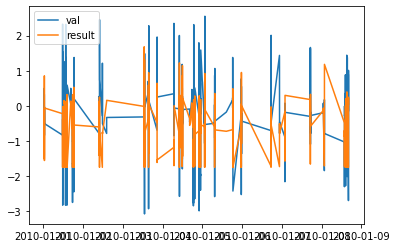

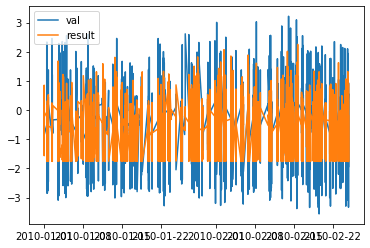

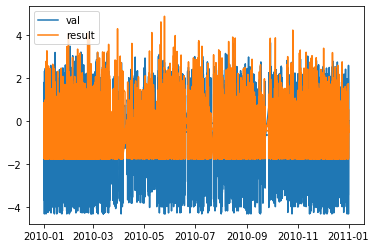

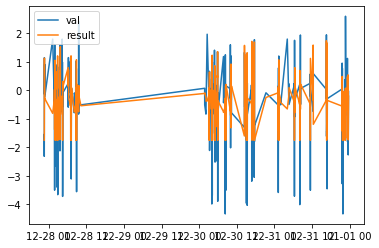

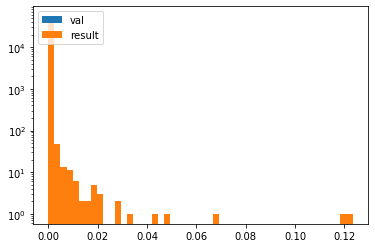

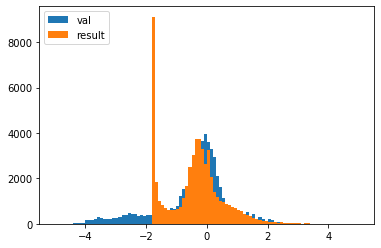

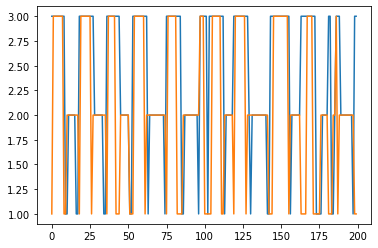

In [55]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

%matplotlib inline

results = model.predict(X_test[:,:148])#, y_val_log.values)#, batch_size=128)
print(results[1].shape)
df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log_res, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [56]:
input1 = Input(shape=(148))
model1 = Dense(int(256),  kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = tf.keras.layers.AlphaDropout(.5)(model1)
model1 = Dense(64, kernel_initializer='lecun_normal', activation='selu')(model1)
model1 = Dense(16,  kernel_initializer='lecun_normal', activation='selu')(model1)
model1 = Dense(4,  kernel_initializer='lecun_normal', activation='selu')(model1)

output1 = Dense(3, activation='softmax',name="class_output")(model1)
output2 = Dense(1,  kernel_initializer='lecun_normal', activation='selu',name="residual")(model1)

model = tensorflow.keras.models.Model(inputs=input1, outputs=[output1, output2])
#compile model using accuracy to measure model performance
losses = {"class_output": "categorical_crossentropy", "residual": "mse",
}
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss=losses, optimizer='adam',  metrics=met)
model.summary()
history = model.fit(X[:,:148], 
                    [y_train_aurora_type_encoded, y_train_log_res], 
                    validation_data=(
                        X_test[:,:148], 
                        [y_val_aurora_type_encoded, y_val_log_res] 
                                    ),
                    batch_size=1024,epochs=100)#, sample_weight=sample_weights)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 148)]        0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 256)          38144       input_3[0][0]                    
__________________________________________________________________________________________________
alpha_dropout_1 (AlphaDropout)  (None, 256)          0           dense_10[0][0]                   
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 64)           16448       alpha_dropout_1[0][0]            
____________________________________________________________________________________________

705/705 [==============================] - 2s 2ms/step - loss: 1.0443 - class_output_loss: 0.2218 - residual_loss: 0.8225 - class_output_accuracy: 0.9046 - residual_mse: 0.8225 - val_loss: 2.6268 - val_class_output_loss: 1.2263 - val_residual_loss: 1.4005 - val_class_output_accuracy: 0.7975 - val_residual_mse: 1.4005
Epoch 20/100
705/705 [==============================] - 2s 2ms/step - loss: 1.0408 - class_output_loss: 0.2210 - residual_loss: 0.8197 - class_output_accuracy: 0.9048 - residual_mse: 0.8197 - val_loss: 2.6958 - val_class_output_loss: 1.2839 - val_residual_loss: 1.4119 - val_class_output_accuracy: 0.7944 - val_residual_mse: 1.4119
Epoch 21/100
705/705 [==============================] - 2s 3ms/step - loss: 1.0363 - class_output_loss: 0.2195 - residual_loss: 0.8167 - class_output_accuracy: 0.9056 - residual_mse: 0.8167 - val_loss: 2.6041 - val_class_output_loss: 1.2217 - val_residual_loss: 1.3824 - val_class_output_accuracy: 0.7991 - val_residual_mse: 1.3824
Epoch 22/100
705/

Epoch 44/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9881 - class_output_loss: 0.2073 - residual_loss: 0.7808 - class_output_accuracy: 0.9109 - residual_mse: 0.7808 - val_loss: 2.5523 - val_class_output_loss: 1.1607 - val_residual_loss: 1.3916 - val_class_output_accuracy: 0.8118 - val_residual_mse: 1.3916
Epoch 45/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9859 - class_output_loss: 0.2071 - residual_loss: 0.7788 - class_output_accuracy: 0.9109 - residual_mse: 0.7788 - val_loss: 2.5989 - val_class_output_loss: 1.1837 - val_residual_loss: 1.4152 - val_class_output_accuracy: 0.8107 - val_residual_mse: 1.4152
Epoch 46/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9846 - class_output_loss: 0.2060 - residual_loss: 0.7786 - class_output_accuracy: 0.9115 - residual_mse: 0.7786 - val_loss: 2.7139 - val_class_output_loss: 1.2784 - val_residual_loss: 1.4355 - val_class_output_accuracy: 0.8052 - val_residual_mse: 1.4355
Epoc

Epoch 69/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9648 - class_output_loss: 0.2016 - residual_loss: 0.7633 - class_output_accuracy: 0.9132 - residual_mse: 0.7633 - val_loss: 2.4938 - val_class_output_loss: 1.1164 - val_residual_loss: 1.3774 - val_class_output_accuracy: 0.8195 - val_residual_mse: 1.3774
Epoch 70/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9633 - class_output_loss: 0.2012 - residual_loss: 0.7622 - class_output_accuracy: 0.9133 - residual_mse: 0.7622 - val_loss: 2.5714 - val_class_output_loss: 1.1588 - val_residual_loss: 1.4126 - val_class_output_accuracy: 0.8177 - val_residual_mse: 1.4126
Epoch 71/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9633 - class_output_loss: 0.2014 - residual_loss: 0.7619 - class_output_accuracy: 0.9132 - residual_mse: 0.7619 - val_loss: 2.5520 - val_class_output_loss: 1.1379 - val_residual_loss: 1.4141 - val_class_output_accuracy: 0.8183 - val_residual_mse: 1.4141
Epoc

Epoch 94/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9504 - class_output_loss: 0.1981 - residual_loss: 0.7524 - class_output_accuracy: 0.9149 - residual_mse: 0.7524 - val_loss: 2.4214 - val_class_output_loss: 1.0647 - val_residual_loss: 1.3567 - val_class_output_accuracy: 0.8227 - val_residual_mse: 1.3567
Epoch 95/100
705/705 [==============================] - 2s 2ms/step - loss: 0.9496 - class_output_loss: 0.1981 - residual_loss: 0.7515 - class_output_accuracy: 0.9148 - residual_mse: 0.7515 - val_loss: 2.4187 - val_class_output_loss: 1.1077 - val_residual_loss: 1.3110 - val_class_output_accuracy: 0.8225 - val_residual_mse: 1.3110
Epoch 96/100
705/705 [==============================] - 2s 2ms/step - loss: 0.9489 - class_output_loss: 0.1979 - residual_loss: 0.7510 - class_output_accuracy: 0.9146 - residual_mse: 0.7510 - val_loss: 2.4380 - val_class_output_loss: 1.1045 - val_residual_loss: 1.3335 - val_class_output_accuracy: 0.8188 - val_residual_mse: 1.3335
Epoc

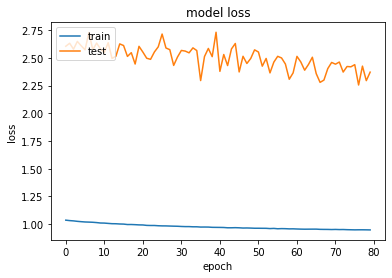

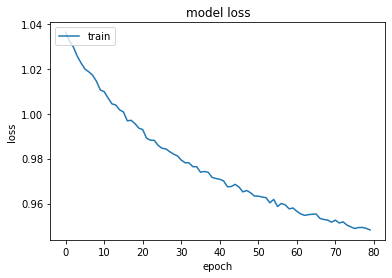

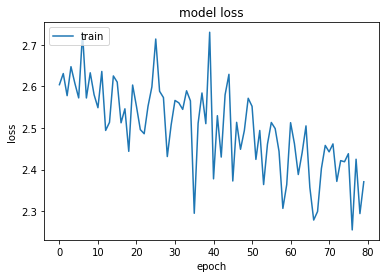

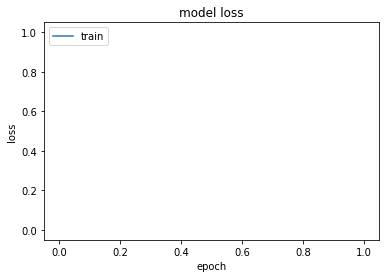

(55210, 1)


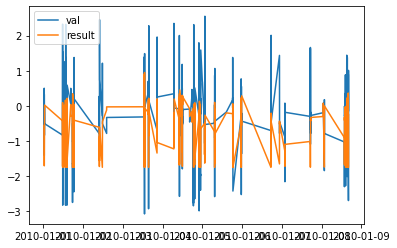

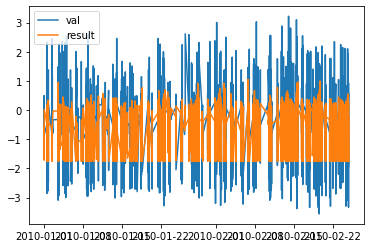

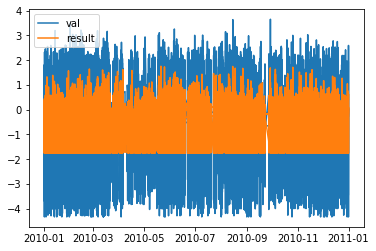

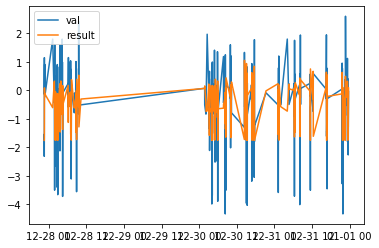

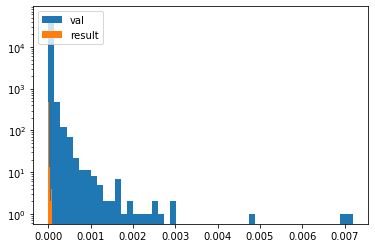

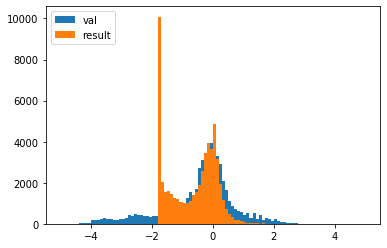

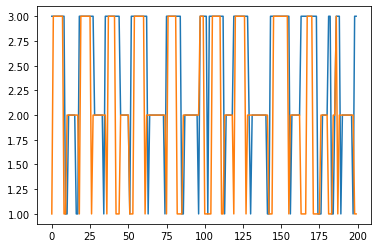

In [57]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

%matplotlib inline

results = model.predict(X_test[:,:148])#, y_val_log.values)#, batch_size=128)
print(results[1].shape)
df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log_res, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()
plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [58]:
from tensorflow.keras.layers import Input, concatenate, AlphaDropout
from tensorflow.keras.models import Model

input1 = Input(shape=(140))


model1 = Dense(512, activation='elu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Dense(128, kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='elu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='elu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='elu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='elu')(merged)
# merged = Dropout(0.5)(merged)

merged = Dense(4, activation='elu')(merged)



output1 = Dense(3, activation='softmax',name="class_output")(merged)
output2 = Dense(1,  activation='elu',name="residual")(merged)

model = tensorflow.keras.models.Model(inputs=[input1,input2], outputs=[output1, output2])
#compile model using accuracy to measure model performance
losses = {"class_output": "categorical_crossentropy", "residual": "mse",
}
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss=losses, optimizer='adam',  metrics=met)
model.summary()

history = model.fit([X[:,8:148],X[:,:8]],  [y_train_aurora_type_encoded, y_train_log_res], 
    validation_data=([X_test[:,8:148],X_test[:,:8]],  [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

results = model.predict([[X_test[:,8:148],X_test[:,:8]]])#, y_val_log.values)#, batch_size=128)



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 140)]        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 512)          72192       input_4[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 512)          4608        input_5[0][0]                    
____________________________________________________________________________________________

705/705 [==============================] - 2s 3ms/step - loss: 0.9935 - class_output_loss: 0.1928 - residual_loss: 0.8007 - class_output_accuracy: 0.9167 - residual_mse: 0.8007 - val_loss: 1.4660 - val_class_output_loss: 0.3741 - val_residual_loss: 1.0919 - val_class_output_accuracy: 0.8629 - val_residual_mse: 1.0919
Epoch 15/100
705/705 [==============================] - 3s 4ms/step - loss: 0.9906 - class_output_loss: 0.1919 - residual_loss: 0.7988 - class_output_accuracy: 0.9172 - residual_mse: 0.7988 - val_loss: 1.4306 - val_class_output_loss: 0.3672 - val_residual_loss: 1.0634 - val_class_output_accuracy: 0.8677 - val_residual_mse: 1.0634
Epoch 16/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9866 - class_output_loss: 0.1906 - residual_loss: 0.7960 - class_output_accuracy: 0.9179 - residual_mse: 0.7960 - val_loss: 1.3897 - val_class_output_loss: 0.3413 - val_residual_loss: 1.0484 - val_class_output_accuracy: 0.8658 - val_residual_mse: 1.0484
Epoch 17/100
705/

Epoch 39/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9399 - class_output_loss: 0.1770 - residual_loss: 0.7629 - class_output_accuracy: 0.9245 - residual_mse: 0.7629 - val_loss: 1.4187 - val_class_output_loss: 0.3541 - val_residual_loss: 1.0645 - val_class_output_accuracy: 0.8674 - val_residual_mse: 1.0645
Epoch 40/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9396 - class_output_loss: 0.1766 - residual_loss: 0.7630 - class_output_accuracy: 0.9248 - residual_mse: 0.7630 - val_loss: 1.4387 - val_class_output_loss: 0.3724 - val_residual_loss: 1.0663 - val_class_output_accuracy: 0.8654 - val_residual_mse: 1.0663
Epoch 41/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9376 - class_output_loss: 0.1767 - residual_loss: 0.7608 - class_output_accuracy: 0.9247 - residual_mse: 0.7608 - val_loss: 1.4687 - val_class_output_loss: 0.3753 - val_residual_loss: 1.0934 - val_class_output_accuracy: 0.8650 - val_residual_mse: 1.0934
Epoc

Epoch 64/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9123 - class_output_loss: 0.1690 - residual_loss: 0.7432 - class_output_accuracy: 0.9287 - residual_mse: 0.7432 - val_loss: 1.4348 - val_class_output_loss: 0.3791 - val_residual_loss: 1.0557 - val_class_output_accuracy: 0.8676 - val_residual_mse: 1.0557
Epoch 65/100
705/705 [==============================] - 2s 3ms/step - loss: 0.9105 - class_output_loss: 0.1687 - residual_loss: 0.7418 - class_output_accuracy: 0.9291 - residual_mse: 0.7418 - val_loss: 1.4842 - val_class_output_loss: 0.4145 - val_residual_loss: 1.0697 - val_class_output_accuracy: 0.8584 - val_residual_mse: 1.0697
Epoch 66/100
705/705 [==============================] - 3s 4ms/step - loss: 0.9099 - class_output_loss: 0.1687 - residual_loss: 0.7413 - class_output_accuracy: 0.9291 - residual_mse: 0.7413 - val_loss: 1.4746 - val_class_output_loss: 0.4020 - val_residual_loss: 1.0727 - val_class_output_accuracy: 0.8707 - val_residual_mse: 1.0727
Epoc

Epoch 89/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8939 - class_output_loss: 0.1636 - residual_loss: 0.7303 - class_output_accuracy: 0.9316 - residual_mse: 0.7303 - val_loss: 1.4509 - val_class_output_loss: 0.3760 - val_residual_loss: 1.0749 - val_class_output_accuracy: 0.8726 - val_residual_mse: 1.0749
Epoch 90/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8937 - class_output_loss: 0.1635 - residual_loss: 0.7302 - class_output_accuracy: 0.9315 - residual_mse: 0.7302 - val_loss: 1.4626 - val_class_output_loss: 0.3847 - val_residual_loss: 1.0779 - val_class_output_accuracy: 0.8671 - val_residual_mse: 1.0779
Epoch 91/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8934 - class_output_loss: 0.1635 - residual_loss: 0.7298 - class_output_accuracy: 0.9315 - residual_mse: 0.7298 - val_loss: 1.4312 - val_class_output_loss: 0.3674 - val_residual_loss: 1.0637 - val_class_output_accuracy: 0.8710 - val_residual_mse: 1.0637
Epoc

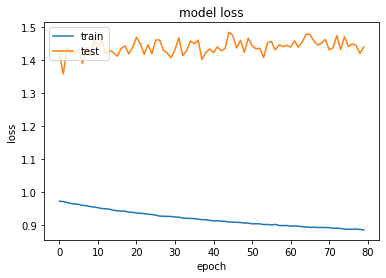

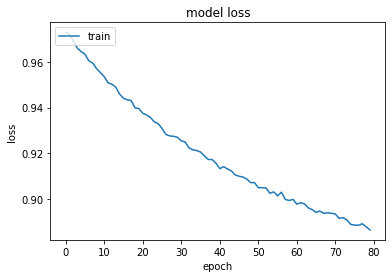

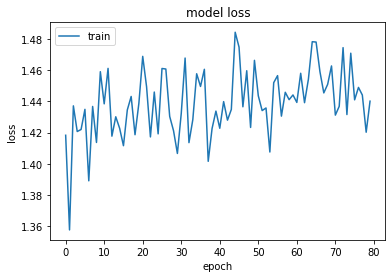

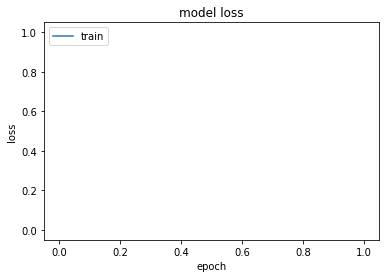

(55210, 1)


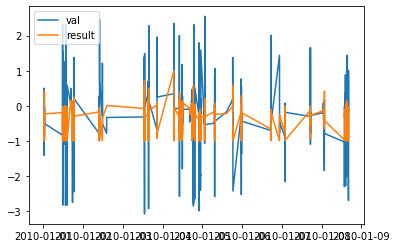

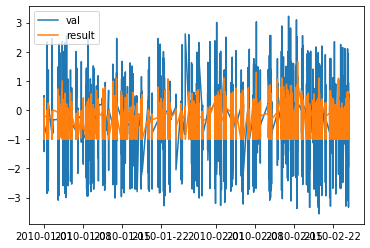

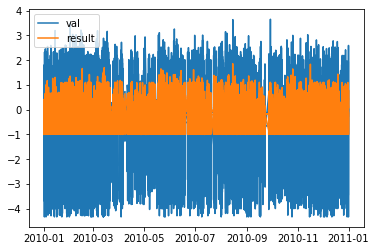

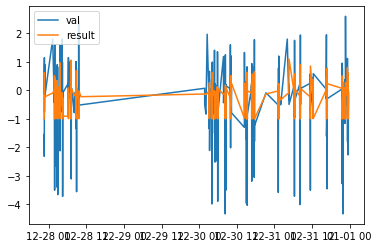

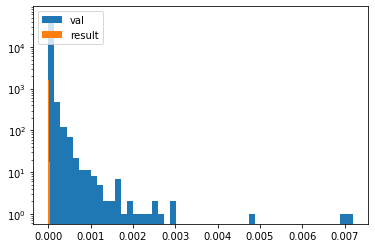

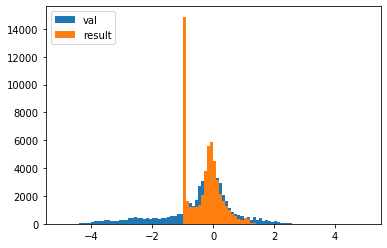

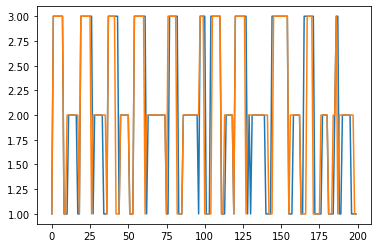

In [59]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

%matplotlib inline

results = model.predict([X_test[:,8:148],X_test[:,:8]])#, y_val_log.values)#, batch_size=128)
print(results[1].shape)
df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log_res, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [60]:
from tensorflow.keras.layers import Input, concatenate, AlphaDropout
from tensorflow.keras.models import Model

input1 = Input(shape=(140))


model1 = Dense(512, activation='elu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Dense(128, kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='elu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='elu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='elu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='elu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(4, activation='elu')(merged)


output1 = Dense(3, activation='softmax',name="class_output")(merged)
output2 = Dense(1,  activation='elu',name="residual")(merged)

model = tensorflow.keras.models.Model(inputs=[input1,input2], outputs=[output1, output2])
#compile model using accuracy to measure model performance
# losses = {"class_output": "categorical_crossentropy", "residual": "mse",
# }
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
model.summary()

history = model.fit([X[:,8:148],X[:,:8]],  [y_train_aurora_type_encoded, y_train_log_res], 
    validation_data=([X_test[:,8:148],X_test[:,:8]],  [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

results = model.predict([[X_test[:,8:148],X_test[:,:8]]])#, y_val_log.values)#, batch_size=128)



Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 140)]        0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 512)          72192       input_6[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 512)          4608        input_7[0][0]                    
____________________________________________________________________________________________

Epoch 15/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8405 - class_output_loss: 0.0428 - residual_loss: 0.7977 - class_output_mse: 0.0428 - residual_mse: 0.7977 - val_loss: 1.1283 - val_class_output_loss: 0.0791 - val_residual_loss: 1.0492 - val_class_output_mse: 0.0791 - val_residual_mse: 1.0492
Epoch 16/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8401 - class_output_loss: 0.0427 - residual_loss: 0.7974 - class_output_mse: 0.0427 - residual_mse: 0.7974 - val_loss: 1.1575 - val_class_output_loss: 0.0829 - val_residual_loss: 1.0745 - val_class_output_mse: 0.0829 - val_residual_mse: 1.0745
Epoch 17/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8379 - class_output_loss: 0.0426 - residual_loss: 0.7952 - class_output_mse: 0.0426 - residual_mse: 0.7952 - val_loss: 1.1282 - val_class_output_loss: 0.0743 - val_residual_loss: 1.0540 - val_class_output_mse: 0.0743 - val_residual_mse: 1.0540
Epoch 18/100
705/705 [============

705/705 [==============================] - 2s 3ms/step - loss: 0.8055 - class_output_loss: 0.0397 - residual_loss: 0.7658 - class_output_mse: 0.0397 - residual_mse: 0.7658 - val_loss: 1.1290 - val_class_output_loss: 0.0708 - val_residual_loss: 1.0582 - val_class_output_mse: 0.0708 - val_residual_mse: 1.0582
Epoch 41/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8043 - class_output_loss: 0.0396 - residual_loss: 0.7647 - class_output_mse: 0.0396 - residual_mse: 0.7647 - val_loss: 1.1343 - val_class_output_loss: 0.0755 - val_residual_loss: 1.0588 - val_class_output_mse: 0.0755 - val_residual_mse: 1.0588
Epoch 42/100
705/705 [==============================] - 2s 3ms/step - loss: 0.8033 - class_output_loss: 0.0394 - residual_loss: 0.7639 - class_output_mse: 0.0394 - residual_mse: 0.7639 - val_loss: 1.1599 - val_class_output_loss: 0.0772 - val_residual_loss: 1.0827 - val_class_output_mse: 0.0772 - val_residual_mse: 1.0827
Epoch 43/100
705/705 [=========================

705/705 [==============================] - 2s 3ms/step - loss: 0.7856 - class_output_loss: 0.0384 - residual_loss: 0.7472 - class_output_mse: 0.0384 - residual_mse: 0.7472 - val_loss: 1.1543 - val_class_output_loss: 0.0726 - val_residual_loss: 1.0817 - val_class_output_mse: 0.0726 - val_residual_mse: 1.0817
Epoch 66/100
705/705 [==============================] - 2s 3ms/step - loss: 0.7847 - class_output_loss: 0.0384 - residual_loss: 0.7463 - class_output_mse: 0.0384 - residual_mse: 0.7463 - val_loss: 1.1264 - val_class_output_loss: 0.0740 - val_residual_loss: 1.0524 - val_class_output_mse: 0.0740 - val_residual_mse: 1.0524
Epoch 67/100
705/705 [==============================] - 2s 3ms/step - loss: 0.7844 - class_output_loss: 0.0383 - residual_loss: 0.7460 - class_output_mse: 0.0383 - residual_mse: 0.7460 - val_loss: 1.1630 - val_class_output_loss: 0.0737 - val_residual_loss: 1.0893 - val_class_output_mse: 0.0737 - val_residual_mse: 1.0893
Epoch 68/100
705/705 [=========================

705/705 [==============================] - 2s 3ms/step - loss: 0.7717 - class_output_loss: 0.0376 - residual_loss: 0.7341 - class_output_mse: 0.0376 - residual_mse: 0.7341 - val_loss: 1.1578 - val_class_output_loss: 0.0745 - val_residual_loss: 1.0833 - val_class_output_mse: 0.0745 - val_residual_mse: 1.0833
Epoch 91/100
705/705 [==============================] - 2s 3ms/step - loss: 0.7711 - class_output_loss: 0.0376 - residual_loss: 0.7335 - class_output_mse: 0.0376 - residual_mse: 0.7335 - val_loss: 1.1769 - val_class_output_loss: 0.0721 - val_residual_loss: 1.1047 - val_class_output_mse: 0.0721 - val_residual_mse: 1.1047
Epoch 92/100
705/705 [==============================] - 2s 3ms/step - loss: 0.7711 - class_output_loss: 0.0376 - residual_loss: 0.7335 - class_output_mse: 0.0376 - residual_mse: 0.7335 - val_loss: 1.1920 - val_class_output_loss: 0.0803 - val_residual_loss: 1.1118 - val_class_output_mse: 0.0803 - val_residual_mse: 1.1118
Epoch 93/100
705/705 [=========================

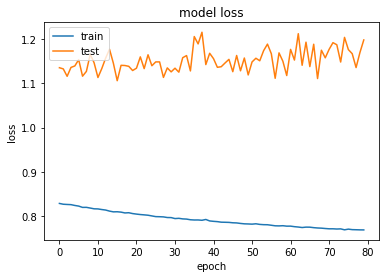

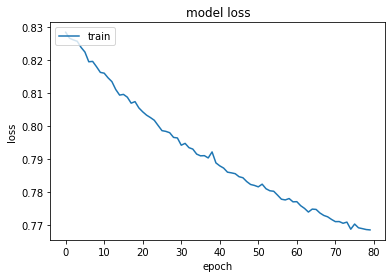

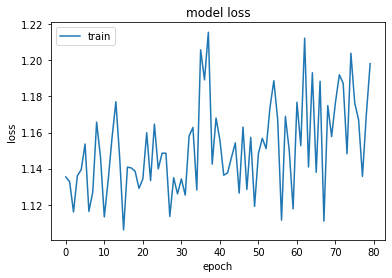

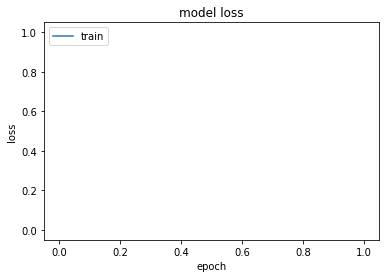

(55210, 1)


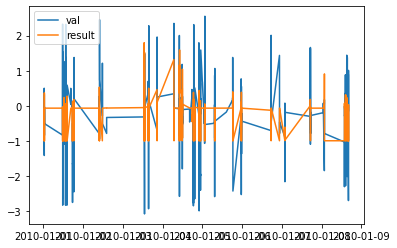

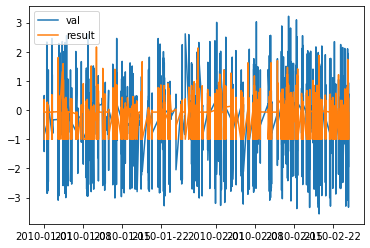

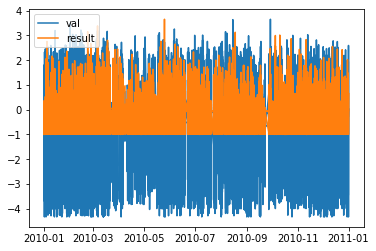

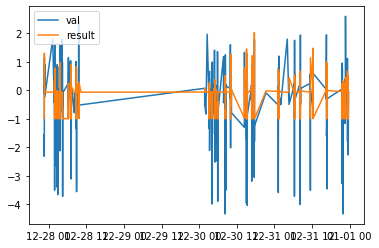

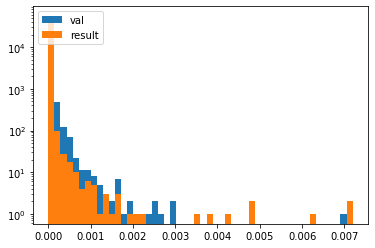

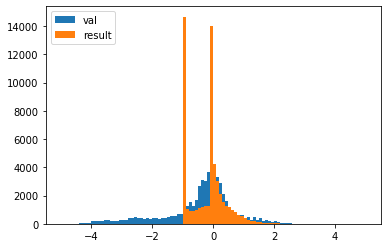

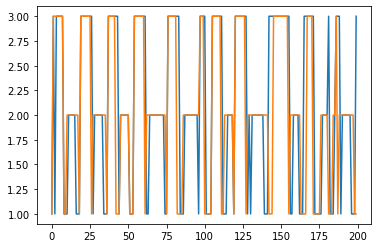

In [61]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

%matplotlib inline

results = model.predict([X_test[:,8:148],X_test[:,:8]])#, y_val_log.values)#, batch_size=128)
print(results[1].shape)
df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log_res, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()
plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [62]:

        
indices_list = ['AE','AL','AU','Bx','By','Bz','SymH','PC','vx','vsw','psw','F107','newell','borovsky']
print(len(indices_list))
indices_list_times = ['', '_5min','_10min','_15min','_30min','_45min','_1hr','_3hr','_5hr','_6hr',]
non_time_input_cols = ['SC_AACGM_LAT','ID_SC', 'sin_ut',
                        'cos_ut', 'sin_doy','cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME']


df_val_cnn = np.zeros((df_val_new.values.shape[0],15,10))
df_val_cnn[:,0,:8]=np.array(df_val_new[non_time_input_cols].values)
print(non_time_input_cols)
for i in range(0,len(indices_list)):
    temp_columns_list = []
    for j in range(0,len(indices_list_times)):
        temp_columns_list.append(indices_list[i]+indices_list_times[j])
    df_val_cnn[:,i+1,:]=np.array(df_val_new[temp_columns_list].values)
    print(temp_columns_list)

df_train_cnn = np.zeros((df_train_new.values.shape[0],15,10))
df_train_cnn[:,0,:8]=np.array(df_train_new[non_time_input_cols].values)
for i in range(0,len(indices_list)):
    temp_columns_list = []
    for j in range(0,len(indices_list_times)):
        temp_columns_list.append(indices_list[i]+indices_list_times[j])
    df_train_cnn[:,i+1,:]=np.array(df_train_new[temp_columns_list].values)
    
# X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
# X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)

df_train_cnn_reshaped = np.reshape(df_train_cnn, (df_train_cnn.shape[0],df_train_cnn.shape[1]*df_train_cnn.shape[2]))
df_val_cnn_reshaped = np.reshape(df_val_cnn, (df_val_cnn.shape[0],df_val_cnn.shape[1]*df_val_cnn.shape[2]))


scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(df_train_cnn_reshaped)
X_train_scaled = np.reshape( scaler_X.transform(df_train_cnn_reshaped),
                          (df_train_cnn.shape[0],df_train_cnn.shape[1],df_train_cnn.shape[2]) ) 
X_val_scaled = np.reshape(scaler_X.transform(df_val_cnn_reshaped), 
                            (df_val_cnn.shape[0],df_val_cnn.shape[1],df_val_cnn.shape[2]) )

# numFeatures = len(X_train.columns.to_list())
# feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)
    
X = np.reshape(np.array(X_train_scaled, dtype=np.float32),
               (X_train_scaled.shape[0],X_train_scaled.shape[1],X_train_scaled.shape[2],1) )
X_test = np.reshape(np.array(X_val_scaled, dtype=np.float32),
                      (X_val_scaled.shape[0],X_val_scaled.shape[1],X_val_scaled.shape[2],1) )

14
['SC_AACGM_LAT', 'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME']
['AE', 'AE_5min', 'AE_10min', 'AE_15min', 'AE_30min', 'AE_45min', 'AE_1hr', 'AE_3hr', 'AE_5hr', 'AE_6hr']
['AL', 'AL_5min', 'AL_10min', 'AL_15min', 'AL_30min', 'AL_45min', 'AL_1hr', 'AL_3hr', 'AL_5hr', 'AL_6hr']
['AU', 'AU_5min', 'AU_10min', 'AU_15min', 'AU_30min', 'AU_45min', 'AU_1hr', 'AU_3hr', 'AU_5hr', 'AU_6hr']
['Bx', 'Bx_5min', 'Bx_10min', 'Bx_15min', 'Bx_30min', 'Bx_45min', 'Bx_1hr', 'Bx_3hr', 'Bx_5hr', 'Bx_6hr']
['By', 'By_5min', 'By_10min', 'By_15min', 'By_30min', 'By_45min', 'By_1hr', 'By_3hr', 'By_5hr', 'By_6hr']
['Bz', 'Bz_5min', 'Bz_10min', 'Bz_15min', 'Bz_30min', 'Bz_45min', 'Bz_1hr', 'Bz_3hr', 'Bz_5hr', 'Bz_6hr']
['SymH', 'SymH_5min', 'SymH_10min', 'SymH_15min', 'SymH_30min', 'SymH_45min', 'SymH_1hr', 'SymH_3hr', 'SymH_5hr', 'SymH_6hr']
['PC', 'PC_5min', 'PC_10min', 'PC_15min', 'PC_30min', 'PC_45min', 'PC_1hr', 'PC_3hr', 'PC_5hr', 'PC_6hr']
['vx', 'vx_5min',

In [80]:
from tensorflow.keras.layers import Input, concatenate, AlphaDropout, Conv2D
from tensorflow.keras.models import Model

input1 = Input(shape=(14,10,1))


model1 = Conv2D(256, kernel_size=(1,10), kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Conv2D(256, kernel_size=(14,1), kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='relu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='relu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='relu')(merged)
# merged = Dropout(0.5)(merged)



output1 = Dense(3, activation='softmax',name="class_output")(merged)

dense4 = Dense(4, activation='relu')(merged)
output2 = Dense(1,  activation='relu',name="residual")(dense4)

model = tensorflow.keras.models.Model(inputs=[input1,input2], outputs=[output1, output2])
#compile model using accuracy to measure model performance
losses = {"class_output": "categorical_crossentropy", "residual": "mse",
}
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss=losses, optimizer='adam',  metrics=met)
model.summary()

history = model.fit([X[:,1:15,:,:],np.reshape(X[:,0,:8,:],(X.shape[0],8))],  [y_train_aurora_type_encoded, y_train_log_res], 
    validation_data=([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))],
                    [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

results = model.predict([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))])#, y_val_log.values)#, batch_size=128)

# history = model.fit([X[:,8:148],X[:,:8]],  [y_train_aurora_type_encoded, y_train_log_res], 
#     validation_data=([X_test[:,8:148],X_test[:,:8]],  [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

# results = model.predict([[X_test[:,8:148],X_test[:,:8]]])#, y_val_log.values)#, batch_size=128)



Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 14, 10, 1)]  0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 14, 1, 256)   2816        input_19[0][0]                   
__________________________________________________________________________________________________
dense_56 (Dense)                (None, 512)          4608        input_20[0][0]                   
___________________________________________________________________________________________

705/705 [==============================] - 8s 12ms/step - loss: 1.3886 - class_output_loss: 0.1897 - residual_loss: 1.1989 - class_output_accuracy: 0.9178 - residual_mse: 1.1989 - val_loss: 1.7796 - val_class_output_loss: 0.3133 - val_residual_loss: 1.4663 - val_class_output_accuracy: 0.8852 - val_residual_mse: 1.4663
Epoch 15/100
705/705 [==============================] - 8s 11ms/step - loss: 1.3869 - class_output_loss: 0.1887 - residual_loss: 1.1983 - class_output_accuracy: 0.9179 - residual_mse: 1.1983 - val_loss: 1.7945 - val_class_output_loss: 0.3282 - val_residual_loss: 1.4663 - val_class_output_accuracy: 0.8789 - val_residual_mse: 1.4663
Epoch 16/100
705/705 [==============================] - 8s 11ms/step - loss: 1.3840 - class_output_loss: 0.1866 - residual_loss: 1.1974 - class_output_accuracy: 0.9188 - residual_mse: 1.1974 - val_loss: 1.7900 - val_class_output_loss: 0.3237 - val_residual_loss: 1.4663 - val_class_output_accuracy: 0.8797 - val_residual_mse: 1.4663
Epoch 17/100
7

Epoch 39/100
705/705 [==============================] - 8s 11ms/step - loss: 1.3401 - class_output_loss: 0.1598 - residual_loss: 1.1803 - class_output_accuracy: 0.9309 - residual_mse: 1.1803 - val_loss: 1.9611 - val_class_output_loss: 0.4932 - val_residual_loss: 1.4679 - val_class_output_accuracy: 0.8728 - val_residual_mse: 1.4679
Epoch 40/100
705/705 [==============================] - 8s 12ms/step - loss: 1.3390 - class_output_loss: 0.1588 - residual_loss: 1.1802 - class_output_accuracy: 0.9310 - residual_mse: 1.1802 - val_loss: 1.8899 - val_class_output_loss: 0.4218 - val_residual_loss: 1.4681 - val_class_output_accuracy: 0.8779 - val_residual_mse: 1.4681
Epoch 41/100
705/705 [==============================] - 8s 11ms/step - loss: 1.3380 - class_output_loss: 0.1588 - residual_loss: 1.1792 - class_output_accuracy: 0.9312 - residual_mse: 1.1792 - val_loss: 1.9154 - val_class_output_loss: 0.4477 - val_residual_loss: 1.4676 - val_class_output_accuracy: 0.8746 - val_residual_mse: 1.4676
E

Epoch 64/100
705/705 [==============================] - 9s 12ms/step - loss: 1.3108 - class_output_loss: 0.1428 - residual_loss: 1.1679 - class_output_accuracy: 0.9386 - residual_mse: 1.1679 - val_loss: 2.0491 - val_class_output_loss: 0.5754 - val_residual_loss: 1.4737 - val_class_output_accuracy: 0.8704 - val_residual_mse: 1.4737
Epoch 65/100
705/705 [==============================] - 8s 11ms/step - loss: 1.3096 - class_output_loss: 0.1418 - residual_loss: 1.1678 - class_output_accuracy: 0.9392 - residual_mse: 1.1678 - val_loss: 2.0200 - val_class_output_loss: 0.5501 - val_residual_loss: 1.4699 - val_class_output_accuracy: 0.8705 - val_residual_mse: 1.4699
Epoch 66/100
705/705 [==============================] - 8s 11ms/step - loss: 1.3073 - class_output_loss: 0.1406 - residual_loss: 1.1667 - class_output_accuracy: 0.9399 - residual_mse: 1.1667 - val_loss: 2.0211 - val_class_output_loss: 0.5505 - val_residual_loss: 1.4706 - val_class_output_accuracy: 0.8675 - val_residual_mse: 1.4706
E

Epoch 89/100
705/705 [==============================] - 8s 11ms/step - loss: 1.2920 - class_output_loss: 0.1318 - residual_loss: 1.1602 - class_output_accuracy: 0.9440 - residual_mse: 1.1602 - val_loss: 2.0287 - val_class_output_loss: 0.5579 - val_residual_loss: 1.4708 - val_class_output_accuracy: 0.8723 - val_residual_mse: 1.4708
Epoch 90/100
705/705 [==============================] - 8s 11ms/step - loss: 1.2906 - class_output_loss: 0.1308 - residual_loss: 1.1598 - class_output_accuracy: 0.9448 - residual_mse: 1.1598 - val_loss: 2.0461 - val_class_output_loss: 0.5780 - val_residual_loss: 1.4681 - val_class_output_accuracy: 0.8703 - val_residual_mse: 1.4681
Epoch 91/100
705/705 [==============================] - 8s 11ms/step - loss: 1.2907 - class_output_loss: 0.1313 - residual_loss: 1.1594 - class_output_accuracy: 0.9442 - residual_mse: 1.1594 - val_loss: 2.0467 - val_class_output_loss: 0.5750 - val_residual_loss: 1.4717 - val_class_output_accuracy: 0.8721 - val_residual_mse: 1.4717
E

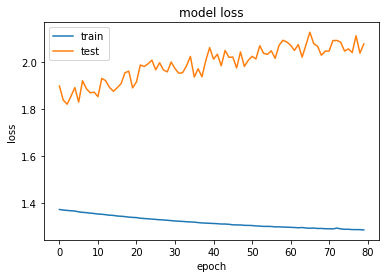

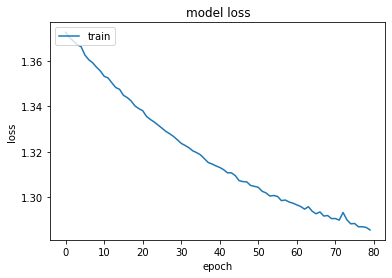

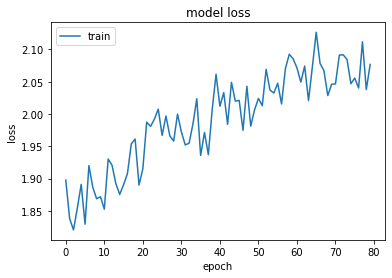

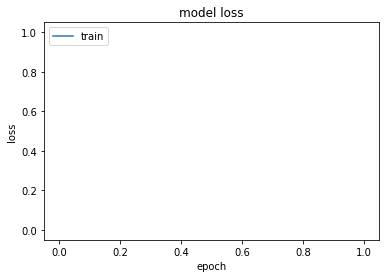

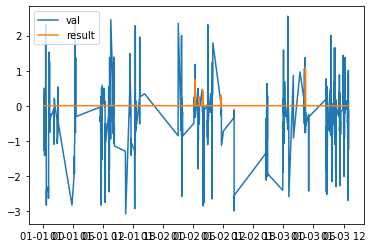

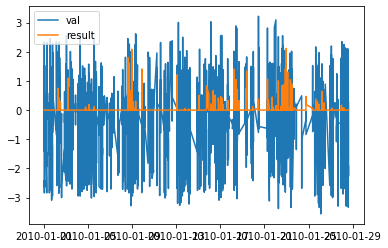

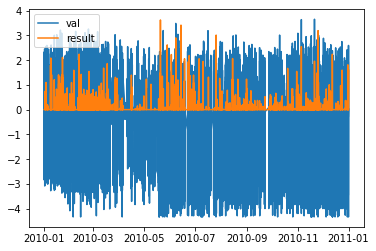

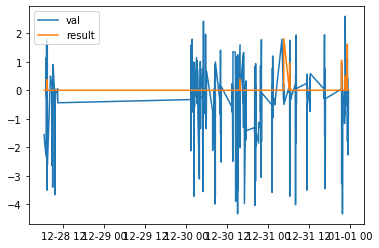

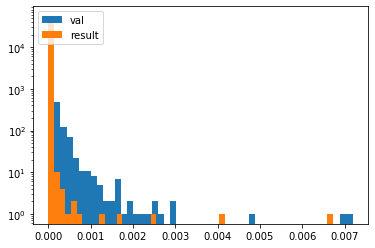

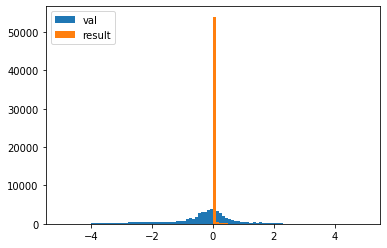

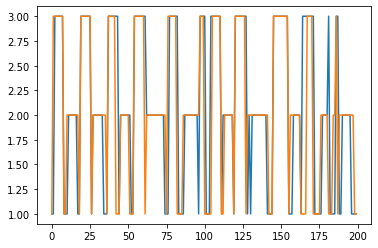

In [81]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log_res, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [72]:
from tensorflow.keras.layers import Input, concatenate, AlphaDropout
from tensorflow.keras.models import Model

input1 = Input(shape=(14,10,1))


model1 = Conv2D(256, kernel_size=(1,10),kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Conv2D(256, kernel_size=(14,1), kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='relu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='relu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(4, activation='relu')(merged)
merged = Dense(1, activation='relu')(merged)

model = Model(inputs=[input1, input2], outputs=merged)

#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

history = model.fit([X[:,1:15,:,:],np.reshape(X[:,0,:8,:],(X.shape[0],8))], np.array(y_train_log1), 
    validation_data=([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))],
                     np.array(y_val_log1)), batch_size=1024,epochs=20)#, sample_weight=sample_weights)

results = model.predict([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))])#, y_val_log.values)#, batch_size=128)


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 14, 10, 1)]  0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 14, 1, 256)   2816        input_15[0][0]                   
__________________________________________________________________________________________________
dense_45 (Dense)                (None, 512)          4608        input_16[0][0]                   
____________________________________________________________________________________________

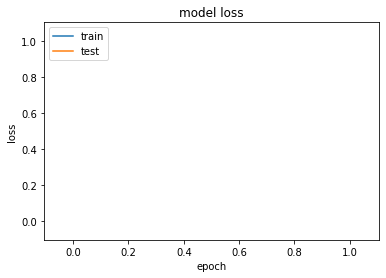

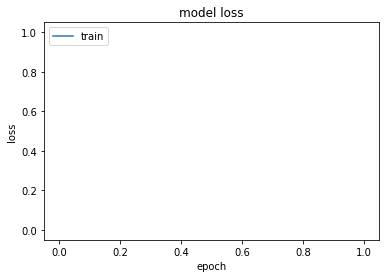

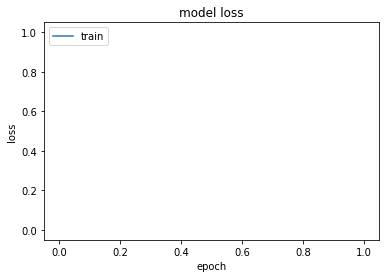

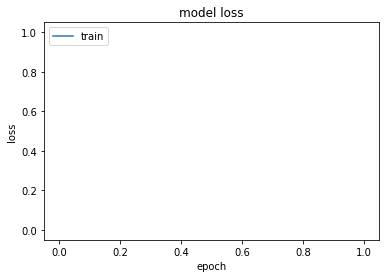

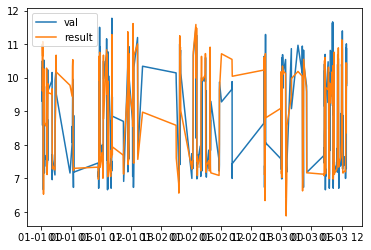

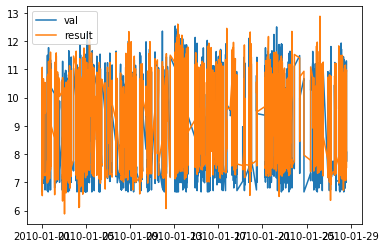

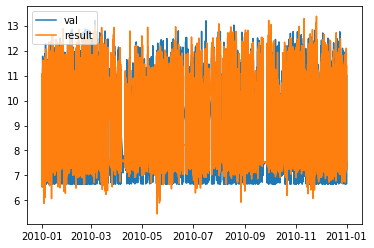

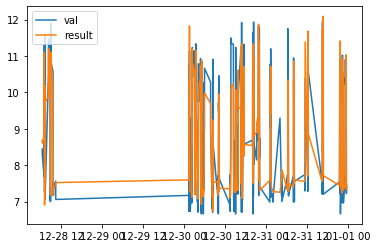

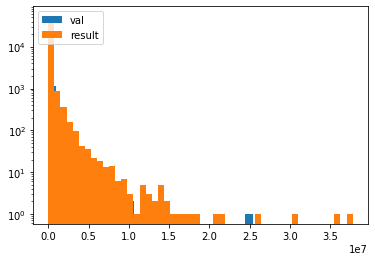

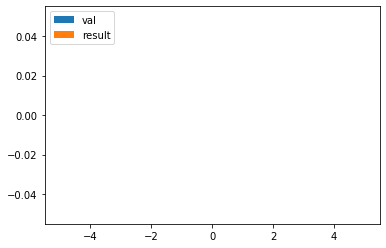

In [76]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

df_results = pd.DataFrame(data=results, index = X_val.index)
y = pd.DataFrame(data=y_val_log1.values, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(-5,5))
plt.hist(df_results.values,bins=100,range=(-5,5))
plt.legend(['val', 'result'], loc='upper left')
plt.show()



In [89]:
from tensorflow.keras.layers import Input, concatenate, AlphaDropout, Conv2D
from tensorflow.keras.models import Model

input1 = Input(shape=(14,10,1))


model1 = Conv2D(256, kernel_size=(1,10), kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Conv2D(256, kernel_size=(14,1), kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='relu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='relu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(4, activation='relu')(merged)


output1 = Dense(3, activation='softmax',name="class_output")(merged)
output2 = Dense(1,  activation='relu',name="residual")(merged)

model = tensorflow.keras.models.Model(inputs=[input1,input2], outputs=[output1, output2])
#compile model using accuracy to measure model performance
losses = {"class_output": "categorical_crossentropy", "residual": "mse",
}
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss=losses, optimizer='adam',  metrics=met)
model.summary()

history = model.fit([X[:,1:15,:,:],np.reshape(X[:,0,:8,:],(X.shape[0],8))],  [y_train_aurora_type_encoded, y_train_log1], 
    validation_data=([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))],
                    [y_val_aurora_type_encoded, y_val_log1]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

results = model.predict([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))])#, y_val_log.values)#, batch_size=128)

# history = model.fit([X[:,8:148],X[:,:8]],  [y_train_aurora_type_encoded, y_train_log_res], 
#     validation_data=([X_test[:,8:148],X_test[:,:8]],  [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

# results = model.predict([[X_test[:,8:148],X_test[:,:8]]])#, y_val_log.values)#, batch_size=128)



Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 14, 10, 1)]  0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 14, 1, 256)   2816        input_31[0][0]                   
__________________________________________________________________________________________________
dense_86 (Dense)                (None, 512)          4608        input_32[0][0]                   
___________________________________________________________________________________________

705/705 [==============================] - 9s 12ms/step - loss: 0.6777 - class_output_loss: 0.2101 - residual_loss: 0.4676 - class_output_accuracy: 0.9124 - residual_mse: 0.4676 - val_loss: 1.1160 - val_class_output_loss: 0.3292 - val_residual_loss: 0.7867 - val_class_output_accuracy: 0.8723 - val_residual_mse: 0.7867
Epoch 15/100
705/705 [==============================] - 9s 12ms/step - loss: 0.6737 - class_output_loss: 0.2089 - residual_loss: 0.4648 - class_output_accuracy: 0.9131 - residual_mse: 0.4648 - val_loss: 1.1524 - val_class_output_loss: 0.3407 - val_residual_loss: 0.8117 - val_class_output_accuracy: 0.8666 - val_residual_mse: 0.8117
Epoch 16/100
705/705 [==============================] - 9s 12ms/step - loss: 0.6701 - class_output_loss: 0.2079 - residual_loss: 0.4622 - class_output_accuracy: 0.9132 - residual_mse: 0.4622 - val_loss: 1.0869 - val_class_output_loss: 0.3215 - val_residual_loss: 0.7654 - val_class_output_accuracy: 0.8759 - val_residual_mse: 0.7654
Epoch 17/100
7

Epoch 39/100
705/705 [==============================] - 8s 12ms/step - loss: 0.6130 - class_output_loss: 0.1883 - residual_loss: 0.4248 - class_output_accuracy: 0.9216 - residual_mse: 0.4248 - val_loss: 1.2316 - val_class_output_loss: 0.3762 - val_residual_loss: 0.8554 - val_class_output_accuracy: 0.8622 - val_residual_mse: 0.8554
Epoch 40/100
705/705 [==============================] - 8s 11ms/step - loss: 0.6116 - class_output_loss: 0.1884 - residual_loss: 0.4232 - class_output_accuracy: 0.9214 - residual_mse: 0.4232 - val_loss: 1.2464 - val_class_output_loss: 0.4007 - val_residual_loss: 0.8456 - val_class_output_accuracy: 0.8552 - val_residual_mse: 0.8456
Epoch 41/100
705/705 [==============================] - 8s 12ms/step - loss: 0.6114 - class_output_loss: 0.1875 - residual_loss: 0.4239 - class_output_accuracy: 0.9214 - residual_mse: 0.4239 - val_loss: 1.2824 - val_class_output_loss: 0.4254 - val_residual_loss: 0.8569 - val_class_output_accuracy: 0.8536 - val_residual_mse: 0.8569
E

Epoch 64/100
705/705 [==============================] - 8s 11ms/step - loss: 0.5839 - class_output_loss: 0.1777 - residual_loss: 0.4063 - class_output_accuracy: 0.9257 - residual_mse: 0.4063 - val_loss: 1.3346 - val_class_output_loss: 0.4393 - val_residual_loss: 0.8953 - val_class_output_accuracy: 0.8515 - val_residual_mse: 0.8953
Epoch 65/100
705/705 [==============================] - 8s 11ms/step - loss: 0.5850 - class_output_loss: 0.1774 - residual_loss: 0.4076 - class_output_accuracy: 0.9255 - residual_mse: 0.4076 - val_loss: 1.3088 - val_class_output_loss: 0.4403 - val_residual_loss: 0.8685 - val_class_output_accuracy: 0.8509 - val_residual_mse: 0.8685
Epoch 66/100
705/705 [==============================] - 8s 11ms/step - loss: 0.5825 - class_output_loss: 0.1771 - residual_loss: 0.4054 - class_output_accuracy: 0.9255 - residual_mse: 0.4054 - val_loss: 1.3980 - val_class_output_loss: 0.4346 - val_residual_loss: 0.9634 - val_class_output_accuracy: 0.8525 - val_residual_mse: 0.9634
E

Epoch 89/100
705/705 [==============================] - 8s 11ms/step - loss: 0.5672 - class_output_loss: 0.1702 - residual_loss: 0.3970 - class_output_accuracy: 0.9287 - residual_mse: 0.3970 - val_loss: 1.3493 - val_class_output_loss: 0.4501 - val_residual_loss: 0.8992 - val_class_output_accuracy: 0.8506 - val_residual_mse: 0.8992
Epoch 90/100
705/705 [==============================] - 8s 11ms/step - loss: 0.5669 - class_output_loss: 0.1697 - residual_loss: 0.3972 - class_output_accuracy: 0.9289 - residual_mse: 0.3972 - val_loss: 1.4550 - val_class_output_loss: 0.5533 - val_residual_loss: 0.9018 - val_class_output_accuracy: 0.8322 - val_residual_mse: 0.9018
Epoch 91/100
705/705 [==============================] - 8s 11ms/step - loss: 0.5652 - class_output_loss: 0.1697 - residual_loss: 0.3955 - class_output_accuracy: 0.9292 - residual_mse: 0.3955 - val_loss: 1.3487 - val_class_output_loss: 0.4446 - val_residual_loss: 0.9041 - val_class_output_accuracy: 0.8540 - val_residual_mse: 0.9041
E

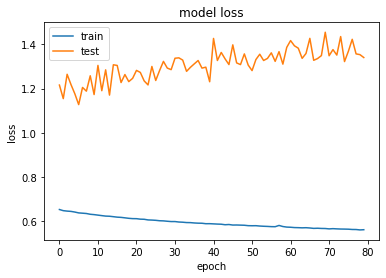

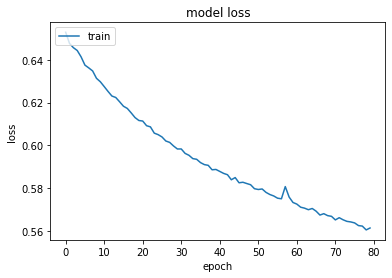

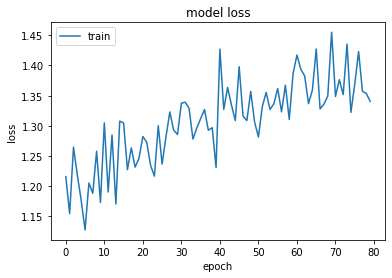

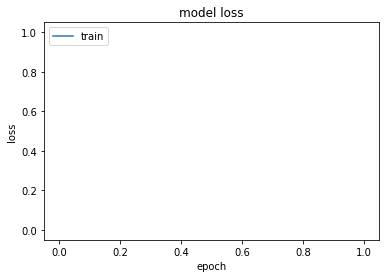

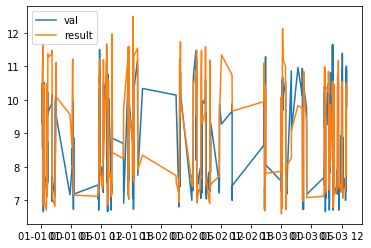

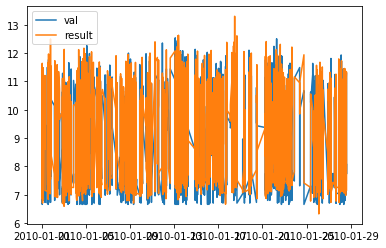

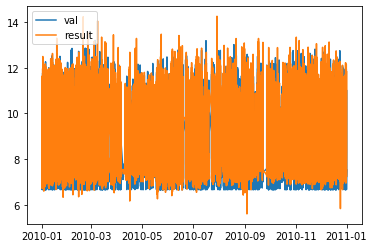

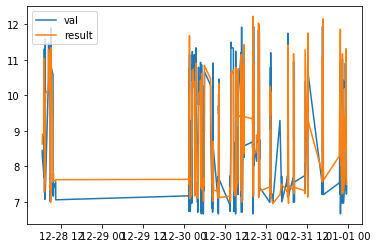

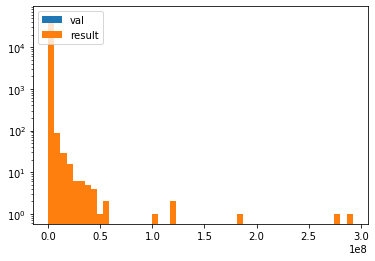

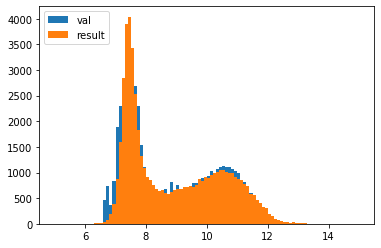

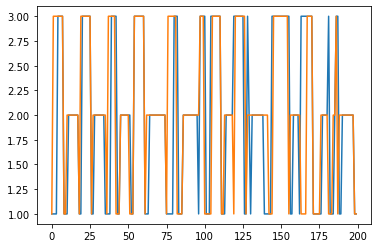

In [90]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log1.values, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(5,15))
plt.hist(df_results.values,bins=100,range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [87]:
from tensorflow.keras.layers import Input, concatenate, AlphaDropout, Conv2D
from tensorflow.keras.models import Model

input1 = Input(shape=(14,10,1))


model1 = Conv2D(256, kernel_size=(1,10), kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Conv2D(256, kernel_size=(14,1), kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='relu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='relu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(4, activation='relu')(merged)


output1 = Dense(3, activation='softmax',name="class_output")(merged)
output2 = Dense(1,  activation='relu',name="residual")(merged)

model = tensorflow.keras.models.Model(inputs=[input1,input2], outputs=[output1, output2])
#compile model using accuracy to measure model performance
losses = {"class_output": "categorical_crossentropy", "residual": "mae",
}
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss=losses, optimizer='adam',  metrics=met)
model.summary()

history = model.fit([X[:,1:15,:,:],np.reshape(X[:,0,:8,:],(X.shape[0],8))],  [y_train_aurora_type_encoded, y_train_log1], 
    validation_data=([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))],
                    [y_val_aurora_type_encoded, y_val_log1]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

results = model.predict([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))])#, y_val_log.values)#, batch_size=128)

# history = model.fit([X[:,8:148],X[:,:8]],  [y_train_aurora_type_encoded, y_train_log_res], 
#     validation_data=([X_test[:,8:148],X_test[:,:8]],  [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

# results = model.predict([[X_test[:,8:148],X_test[:,:8]]])#, y_val_log.values)#, batch_size=128)



Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 14, 10, 1)]  0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 14, 1, 256)   2816        input_29[0][0]                   
__________________________________________________________________________________________________
dense_81 (Dense)                (None, 512)          4608        input_30[0][0]                   
___________________________________________________________________________________________

705/705 [==============================] - 8s 12ms/step - loss: 1.1889 - class_output_loss: 0.6985 - residual_loss: 0.4903 - class_output_accuracy: 0.7039 - residual_mse: 0.5348 - val_loss: 1.3380 - val_class_output_loss: 0.6486 - val_residual_loss: 0.6894 - val_class_output_accuracy: 0.6893 - val_residual_mse: 1.0029
Epoch 15/100
705/705 [==============================] - 8s 12ms/step - loss: 1.1685 - class_output_loss: 0.6751 - residual_loss: 0.4934 - class_output_accuracy: 0.7134 - residual_mse: 0.5401 - val_loss: 1.3284 - val_class_output_loss: 0.6461 - val_residual_loss: 0.6823 - val_class_output_accuracy: 0.7063 - val_residual_mse: 0.9590
Epoch 16/100
705/705 [==============================] - 8s 12ms/step - loss: 1.1498 - class_output_loss: 0.6530 - residual_loss: 0.4968 - class_output_accuracy: 0.7222 - residual_mse: 0.5452 - val_loss: 1.2927 - val_class_output_loss: 0.6206 - val_residual_loss: 0.6721 - val_class_output_accuracy: 0.7245 - val_residual_mse: 0.9376
Epoch 17/100
7

Epoch 39/100
705/705 [==============================] - 8s 12ms/step - loss: 0.9698 - class_output_loss: 0.4488 - residual_loss: 0.5211 - class_output_accuracy: 0.8293 - residual_mse: 0.5628 - val_loss: 1.3441 - val_class_output_loss: 0.5768 - val_residual_loss: 0.7673 - val_class_output_accuracy: 0.7882 - val_residual_mse: 1.1371
Epoch 40/100
705/705 [==============================] - 8s 12ms/step - loss: 0.9678 - class_output_loss: 0.4462 - residual_loss: 0.5217 - class_output_accuracy: 0.8300 - residual_mse: 0.5631 - val_loss: 1.3213 - val_class_output_loss: 0.5632 - val_residual_loss: 0.7580 - val_class_output_accuracy: 0.7992 - val_residual_mse: 1.1052
Epoch 41/100
705/705 [==============================] - 8s 12ms/step - loss: 0.9124 - class_output_loss: 0.3929 - residual_loss: 0.5195 - class_output_accuracy: 0.8509 - residual_mse: 0.5566 - val_loss: 1.1983 - val_class_output_loss: 0.4834 - val_residual_loss: 0.7148 - val_class_output_accuracy: 0.8631 - val_residual_mse: 0.9780
E

Epoch 64/100
705/705 [==============================] - 8s 12ms/step - loss: 0.6404 - class_output_loss: 0.1905 - residual_loss: 0.4499 - class_output_accuracy: 0.9211 - residual_mse: 0.4532 - val_loss: 1.0697 - val_class_output_loss: 0.3977 - val_residual_loss: 0.6720 - val_class_output_accuracy: 0.8733 - val_residual_mse: 0.8715
Epoch 65/100
705/705 [==============================] - 8s 12ms/step - loss: 0.6395 - class_output_loss: 0.1899 - residual_loss: 0.4497 - class_output_accuracy: 0.9209 - residual_mse: 0.4527 - val_loss: 1.0210 - val_class_output_loss: 0.3556 - val_residual_loss: 0.6654 - val_class_output_accuracy: 0.8799 - val_residual_mse: 0.8485
Epoch 66/100
705/705 [==============================] - 8s 12ms/step - loss: 0.6377 - class_output_loss: 0.1886 - residual_loss: 0.4491 - class_output_accuracy: 0.9217 - residual_mse: 0.4522 - val_loss: 1.0512 - val_class_output_loss: 0.3738 - val_residual_loss: 0.6774 - val_class_output_accuracy: 0.8782 - val_residual_mse: 0.8807
E

Epoch 89/100
705/705 [==============================] - 8s 12ms/step - loss: 0.6156 - class_output_loss: 0.1774 - residual_loss: 0.4381 - class_output_accuracy: 0.9261 - residual_mse: 0.4395 - val_loss: 1.2330 - val_class_output_loss: 0.5393 - val_residual_loss: 0.6937 - val_class_output_accuracy: 0.8525 - val_residual_mse: 0.9398
Epoch 90/100
705/705 [==============================] - 9s 12ms/step - loss: 0.6150 - class_output_loss: 0.1772 - residual_loss: 0.4379 - class_output_accuracy: 0.9265 - residual_mse: 0.4392 - val_loss: 1.1323 - val_class_output_loss: 0.4605 - val_residual_loss: 0.6718 - val_class_output_accuracy: 0.8632 - val_residual_mse: 0.8858
Epoch 91/100
705/705 [==============================] - 9s 12ms/step - loss: 0.6140 - class_output_loss: 0.1766 - residual_loss: 0.4374 - class_output_accuracy: 0.9266 - residual_mse: 0.4385 - val_loss: 1.1355 - val_class_output_loss: 0.4806 - val_residual_loss: 0.6549 - val_class_output_accuracy: 0.8596 - val_residual_mse: 0.8581
E

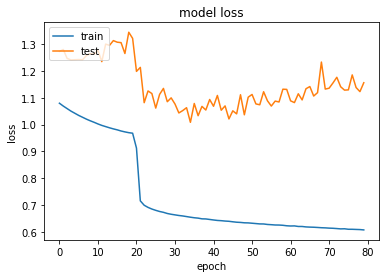

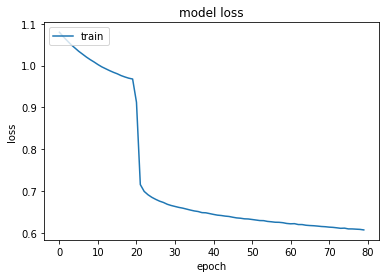

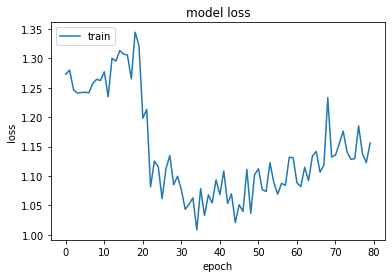

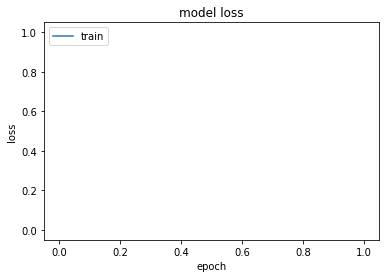

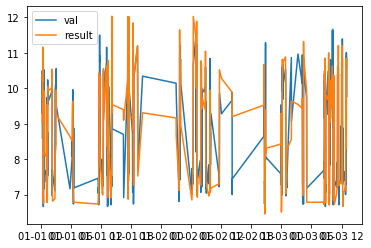

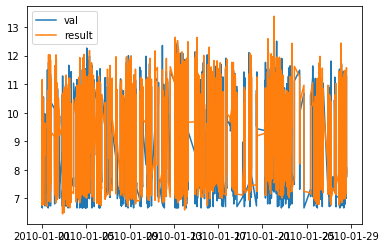

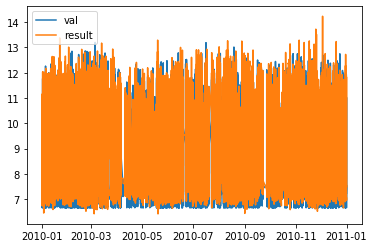

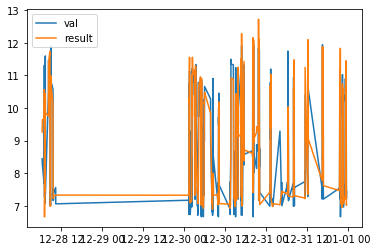

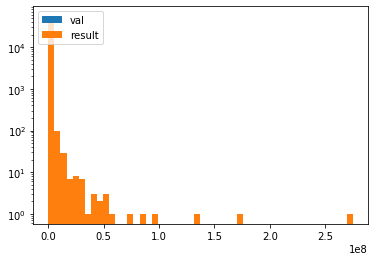

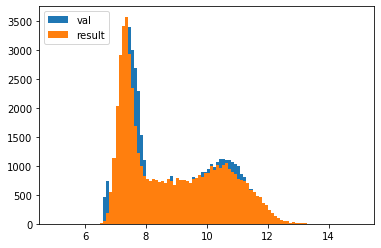

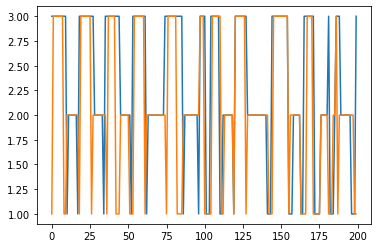

In [88]:
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

df_results = pd.DataFrame(data=results[1], index = X_val.index)
y = pd.DataFrame(data=y_val_log1.values, index = X_val.index)

plt.figure()
plt.plot(y[:500])
plt.plot(df_results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:5000])
plt.plot(df_results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[:])
plt.plot(df_results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.plot(y[-500:])
plt.plot(df_results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()



plt.figure()
plt.hist(10**y.values[:]*1.6e-6,bins=50,log=True)
plt.hist(10**df_results.values*1.6e-6,bins=50,log=True)
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure()
plt.hist(y.values[:],bins=100,range=(5,15))
plt.hist(df_results.values,bins=100,range=(5,15))
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.plot(np.argmax(results[0],1)[:200]+1)
plt.plot(df_val_new['aurora_type'].values[:200])

In [85]:

import keras.backend as K

def custom(y_true, y_pred):
#     argmaxes_p = K.argmax(y_pred[:,0:3], axis=1)
#     argmaxes_t = K.argmax(y_true[:,0:3], axis=1) 
#     map = [11.,7.5,10.]

#     loss = K.mean(K.square(y_pred - y_true+abs(map[argmaxes_p]-map[argmaxes_t])))  # (batch_size, 2)

    loss[0:3] = K.mean(K.square(y_pred[:,0:3] - y_true[:,0:3]))  # (batch_size, 2)
    
    argmaxes_p = K.argmax(y_pred[:,0:3], axis=1)
    argmaxes_t = K.argmax(y_true[:,0:3], axis=1)
 
    map = [11.,7.5,10.]
    for i in range(0,y_true.shape[0]):
        error[i] = (y_pred[i,3]+map[argmaxes_p[i]]) - (y_true[i,3]+map[argmaxes_t[i]]) 

    loss[3] = K.mean(K.square(error))
    
    return loss


from tensorflow.keras.layers import Input, concatenate, AlphaDropout, Conv2D
from tensorflow.keras.models import Model

input1 = Input(shape=(14,10,1))


model1 = Conv2D(256, kernel_size=(1,10), kernel_initializer='lecun_normal', activation='selu')(input1)
model1 = AlphaDropout(0.5)(model1)
model1 = Conv2D(256, kernel_size=(14,1), kernel_initializer='lecun_normal', activation='selu')(model1)
#model1 = Dropout(0.5)(model1)

model1 = Flatten()(model1)

input2 = Input(shape=(8))

model2 = Dense(512, activation='relu')(input2)
model2 = Dropout(0.5)(model2)
model2 = Dense(128,activation='relu')(model2)


model2 = Flatten()(model2)


merged =concatenate([model1, model2])
# merged = Dropout(0.5)(merged)

merged = Dense(128, activation='relu')(merged)
# merged = Dropout(0.5)(merged)
merged = Dense(16, activation='relu')(merged)
# merged = Dropout(0.5)(merged)



output1 = Dense(3, activation='softmax',name="class_output")(merged)

dense4 = Dense(4, activation='relu')(merged)
output2 = Dense(1,  activation='relu',name="residual")(dense4)

model = tensorflow.keras.models.Model(inputs=[input1,input2], outputs=[output1, output2])
#compile model using accuracy to measure model performance
losses = {"class_output": "categorical_crossentropy", "residual": "mse",
}
met = {"class_output": "accuracy", "residual": "mse",
}
model.compile(loss=custom, optimizer='adam',  metrics=met)
model.summary()

history = model.fit([X[:,1:15,:,:],np.reshape(X[:,0,:8,:],(X.shape[0],8))],  [y_train_aurora_type_encoded, y_train_log_res], 
    validation_data=([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))],
                    [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

results = model.predict([X_test[:,1:15,:,:],np.reshape(X_test[:,0,:8,:],(X_test.shape[0],8))])#, y_val_log.values)#, batch_size=128)

# history = model.fit([X[:,8:148],X[:,:8]],  [y_train_aurora_type_encoded, y_train_log_res], 
#     validation_data=([X_test[:,8:148],X_test[:,:8]],  [y_val_aurora_type_encoded, y_val_log_res]), batch_size=1024,epochs=100)#, sample_weight=sample_weights)

# results = model.predict([[X_test[:,8:148],X_test[:,:8]]])#, y_val_log.values)#, batch_size=128)



Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 14, 10, 1)]  0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 14, 1, 256)   2816        input_25[0][0]                   
__________________________________________________________________________________________________
dense_71 (Dense)                (None, 512)          4608        input_26[0][0]                   
___________________________________________________________________________________________

TypeError: in user code:

    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    <ipython-input-85-edffa5f976e1>:8 custom
        loss = K.mean(K.square(y_pred - y_true+abs(map[argmaxes_p]-map[argmaxes_t])))  # (batch_size, 2)

    TypeError: list indices must be integers or slices, not Tensor
